<span style="display: block; text-align: center; font-size: 36px; color: #FFA500; font-weight: bold;">
    PROYECTO BIOGENESYS
</span>

### Carga y transformación de los datos

En este primer avance nos centraremos en el dataset proporcionado. El archivo original es considerable, con un peso de aproximadamente **21 GB**, conteniendo alrededor de **22 millones de registros** y **707 columnas**. Conscientes de esta magnitud, los compañeros de ingeniería de datos han preparado un dataset específico, enfocado en los datos de los países de **Latinoamérica**. Este nuevo archivo, en formato **CSV**, cuenta con **12,216,057 filas** y **50 columnas**, lo que facilitará su manipulación y análisis. 

Además, han creado un archivo adicional para facilitar el trabajo: **`readme.txt`** que contiene información detallada sobre las columnas seleccionadas. Es importante resaltar la importancia de una adecuada **preparación** y **limpieza de datos** para el análisis subsiguiente.

### Consignas

1. **Lee el archivo `Readme.txt`** y analiza las columnas y datos que se van a utilizar para obtener un mayor conocimiento del dataset.

2. **Crea un nuevo notebook** llamado `PIDA_M4_Alexis_Medina.ipynb` 

3. **Lee el archivo `data_latinoamerica.csv`** con código Python en tu Visual Studio Code. 
   > **¡ATENCIÓN!** Este proceso puede demorar algunos minutos.

4. **Comprueba que el dataset cargado** tiene la cantidad de registros y columnas especificadas (Recuerda que hay una función para ello).

5. **Selecciona los países** donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brasil.

6. **Filtra los datos** en fechas mayores a `2021-01-01`.

7. **Compara a nivel de país** para llenar valores faltantes.

8. **Realiza una limpieza preliminar** de los datos, eliminando registros nulos y corrigiendo los tipos de datos donde sea necesario. Trata con valores medios, valores anteriores o valores siguientes.

9. **Examina las características básicas** del dataset para comprender la distribución de las variables clave como la incidencia de COVID-19 e identifica las variables que consideras que son claves para tu análisis.

10. **Guarda los datos filtrados** en un archivo con el nombre `DatosFinalesFiltrado.csv` a fin de poder utilizarlo luego y no tener que repetir el proceso de filtrado y limpieza.

11. **Aplica bucles `for` y/o `while`** para el cálculo de estadísticas descriptivas y otras métricas importantes que ofrece pandas por default. Luego responde:
    - ¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?
    - ¿Se muestran todas las estadísticas en todas las columnas durante el análisis?
    - ¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?

12. **Crea una función** que permita obtener la mediana, varianza y el rango. Te dejamos algunas preguntas para analizar esas medidas:
    - ¿Qué representa la mediana?
    - ¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango?
    - ¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?


### EXTRA CREDIT

`Explorar el uso de funciones de orden superior para una manipulación eficiente de los datos`

<span style="display: block; text-align: center; font-size: 30px; color: #FFA500; font-weight: bold;">
    COMENZAMOS
</span>

In [1]:
#IMPORTANDO LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#lEMOS EL DATASET
data = pd.read_csv("D:\\Alexis\\CURSOS\\7. PYTHON\\BootCamp\\PI\\import\\data_latinoamerica.csv", sep=',')

In [3]:
#TAMAÑO FILAS Y COLUMNAS
np.shape(data)

(12216057, 50)

*Siguiendo con lo solicitado por el área de ingeniería de datos y el objetivo del proyecto nos podemos enfocar en los 6 países que se han propuesto para el análisis.*

In [4]:
#SE HACE UN FILTRO POR PAISES DE LATAM
paises_seleccionados = ['Argentina','Chile','Colombia','Mexico','Peru','Brazil']
data_latinoamerica = data[data['country_name'].isin(paises_seleccionados)]

*Por ahora vemos que tenemos esta cantidad de instancias, siendo esto una cantidad considerable de datos para trabajar.*

In [5]:
#NUEVO TAMAÑO DE DATA
np.shape(data_latinoamerica)

(11970289, 50)

In [5]:
#CONOCER LAS COLUMNAS CON DATOS NULOS
data_latinoamerica.isnull().sum()

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689


Nos podemos preguntar que tan buena es la calidad de nuestros datos, esto lo hubieramos podrido hacer en el paso anterior, pero por ahora lo haremos en este paso.
Verificaremos la cantidad de datos faltantes por columna y si es necesario haremos una limpieza de los datos donde se presenten valores mayores a 4 millones de datos
faltantes.

In [6]:
#IDENTIFICAR COLUMNAS QUE TIENEN UNA CANTIDAD MUY GRANDE DE DATOS NULOS 
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum()>4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


*Despues de haber hecho un análisis de la calidad de los datos, podemos ver que tenemos datos faltantes en muchas columnas, por 10 que despues realizaremos un nuevo
filtro por la columna "Location_key" pero solo vamos a ustilizar las instancias que correspondan a los países que hemos seleccionado y no a sus regiones o subregiones
AR, CL, CO, MX, PE, BR.*

In [7]:
#FILTRO QUE CONTENDRA UNICAMENTE LOS PAISES DE LATAM
data_latinoamerica_paises = data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]

In [9]:
#VISUALIZAR EL TAMAÑO DEL DF
np.shape(data_latinoamerica_paises)

(5946, 50)

*Para facilidad y comprensión de los datos, vamos a tomar los datos a partir de la fecha 2021-01-01, ya que es la fecha en la que se empezaron a registrar mejor los datos.*

In [9]:
#CREA UN NUEVO DF QUE CONTENDRA LAS DATOS CON FECHAS POSTERIORES AL 1-ENERO-2021
data_latinoamerica_paises_fecha = data_latinoamerica_paises[data_latinoamerica_paises['date']>'2021-01-01']

In [10]:
#VISUALIZAR EL TAMAÑO DEL DF
np.shape(data_latinoamerica_paises_fecha)

(3744, 50)

*Con el nuevo filtro vamos a ver que cantidad de elementos tenemos vacios, en caso de tenerlos, debemos proceder a eliminarlos.*

In [12]:
#CONTAMOS VALORES VACIOS
valores_nulos_fecha = data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum()>0]
valores_nulos_fecha

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64

In [ ]:
#USAMOS FOR PARA COMPLETAR VALORES NULOS DE LAS COLUMNAS DE LA MEDIA DE CADA PAIS
for pais in paises_seleccionados:
    data_latinoamerica_paises_fecha['new_confirmed'] = data_latinoamerica_paises_fecha['new_confirmed'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['new_confirmed'].mean())
    data_latinoamerica_paises_fecha['new_deceased'] = data_latinoamerica_paises_fecha['new_deceased'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['new_deceased'].mean())
    data_latinoamerica_paises_fecha['rainfall_mm'] = data_latinoamerica_paises_fecha['rainfall_mm'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['rainfall_mm'].mean())
    data_latinoamerica_paises_fecha['relative_humidity'] = data_latinoamerica_paises_fecha['relative_humidity'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['relative_humidity'].mean())
    data_latinoamerica_paises_fecha['average_temperature_celsius'] = data_latinoamerica_paises_fecha['average_temperature_celsius'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['average_temperature_celsius'].mean())
    data_latinoamerica_paises_fecha['minimum_temperature_celsius'] = data_latinoamerica_paises_fecha['minimum_temperature_celsius'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['minimum_temperature_celsius'].mean())
    data_latinoamerica_paises_fecha['maximum_temperature_celsius'] = data_latinoamerica_paises_fecha['maximum_temperature_celsius'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['maximum_temperature_celsius'].mean())

#LLENAR CON 0 LAS COLUMNAS SIGUIENTES 
data_latinoamerica_paises_fecha['new_recovered'] = data_latinoamerica_paises_fecha['new_recovered'].fillna(0)

# Aplicar forward fill y backward fill a columnas acumulativas
columns_to_fill = ['cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_vaccine_doses_administered']
for column in columns_to_fill:
    data_latinoamerica_paises_fecha[column] = data_latinoamerica_paises_fecha.groupby('country_name')[column].ffill().bfill()


In [11]:
# Rellenar valores nulos con la media de cada país usando groupby, transform y lambda
data_latinoamerica_paises_fecha['new_confirmed'] = data_latinoamerica_paises_fecha.groupby('country_name')['new_confirmed'].transform(lambda x: x.fillna(x.mean()))
data_latinoamerica_paises_fecha['new_deceased'] = data_latinoamerica_paises_fecha.groupby('country_name')['new_deceased'].transform(lambda x: x.fillna(x.mean()))
data_latinoamerica_paises_fecha['rainfall_mm'] = data_latinoamerica_paises_fecha.groupby('country_name')['rainfall_mm'].transform(lambda x: x.fillna(x.mean()))
data_latinoamerica_paises_fecha['relative_humidity'] = data_latinoamerica_paises_fecha.groupby('country_name')['relative_humidity'].transform(lambda x: x.fillna(x.mean()))
data_latinoamerica_paises_fecha['average_temperature_celsius'] = data_latinoamerica_paises_fecha.groupby('country_name')['average_temperature_celsius'].transform(lambda x: x.fillna(x.mean()))
data_latinoamerica_paises_fecha['minimum_temperature_celsius'] = data_latinoamerica_paises_fecha.groupby('country_name')['minimum_temperature_celsius'].transform(lambda x: x.fillna(x.mean()))
data_latinoamerica_paises_fecha['maximum_temperature_celsius'] = data_latinoamerica_paises_fecha.groupby('country_name')['maximum_temperature_celsius'].transform(lambda x: x.fillna(x.mean()))

# Llenar NaN con el valor de 0 en la columna new_recovered para hacer análisis de estos datos
data_latinoamerica_paises_fecha['new_recovered'] = data_latinoamerica_paises_fecha['new_recovered'].fillna(0)

# Aplicar forward fill y backward fill a columnas acumulativas
columns_to_fill = ['cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_vaccine_doses_administered']
for column in columns_to_fill:
    data_latinoamerica_paises_fecha[column] = data_latinoamerica_paises_fecha.groupby('country_name')[column].ffill().bfill()


C:\Users\USER\AppData\Local\Temp\ipykernel_25764\4267724358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha['new_confirmed'] = data_latinoamerica_paises_fecha.groupby('country_name')['new_confirmed'].transform(lambda x: x.fillna(x.mean()))
C:\Users\USER\AppData\Local\Temp\ipykernel_25764\4267724358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha['new_deceased'] = data_latinoamerica_paises_fecha.groupby('country_name')['new_deceased'].tr

*Nuevamente verificamos la cantidad de instancias vacias y las dimensiones del nuevo dataset.*

In [12]:
# VISUALIZAR COLUMAS CON VALORES NULOS
print(data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum()>0])
print(np.shape(data_latinoamerica_paises_fecha))

cumulative_recovered    1248
dtype: int64
(3744, 50)


In [13]:
# SE CONFIRMA LA LIMPIEZA DE (cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered) Y QUE NO HAYA NULOS
print(data_latinoamerica_paises_fecha[['cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered']].isnull().sum())


cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
dtype: int64


In [14]:
# CONTAMOS 0 Y VALORES NULOS DE CADA COLUMNA
ceros = (data_latinoamerica_paises_fecha == 0).sum()
nulos = data_latinoamerica_paises_fecha.isnull().sum()

# Mostrar ambos resultados
print("Ceros en cada columna:")
print(ceros)
print("\nValores nulos en cada columna:")
print(nulos)


Ceros en cada columna:
location_key                                0
date                                        0
country_code                                0
country_name                                0
new_confirmed                             207
new_deceased                              214
cumulative_confirmed                        0
cumulative_deceased                         0
cumulative_vaccine_doses_administered       0
population                                  0
population_male                             0
population_female                           0
population_rural                            0
population_urban                            0
population_density                          0
human_development_index                     0
population_age_00_09                        0
population_age_10_19                        0
population_age_20_29                        0
population_age_30_39                        0
population_age_40_49                        0
population_

In [15]:
# Contar la cantidad de valores negativos en la columna 'new_confirmed'
negativos_new_confirmed = (data_latinoamerica_paises_fecha['new_confirmed'] < 0).sum()
negativos_new_recovered = (data_latinoamerica_paises_fecha['new_recovered'] < 0).sum()

# Imprimir la cantidad de valores negativos
print(f"Cantidad de valores negativos en 'new_confirmed': {negativos_new_confirmed}")
print(f"Cantidad de valores negativos en 'new_recovered': {negativos_new_recovered}")



Cantidad de valores negativos en 'new_confirmed': 1
Cantidad de valores negativos en 'new_recovered': 12


En este contexto no es correcto tener valores negativos en el conteo de casos nuevos y recuperados, por lo tanto se cambiaran por 0 (ya que tampoco tenemos la razon de este error y al ser pocos datos no nos modifcican mucho).

In [16]:
# Reemplazar valores negativos con 0 en la columna 'new_confirmed'
data_latinoamerica_paises_fecha['new_confirmed'] = data_latinoamerica_paises_fecha['new_confirmed'].apply(lambda x: max(x, 0))

# Reemplazar valores negativos con 0 en la columna 'new_recovered'
data_latinoamerica_paises_fecha['new_recovered'] = data_latinoamerica_paises_fecha['new_recovered'].apply(lambda x: max(x, 0))

# Verificar que los valores negativos hayan sido reemplazados
negativos_new_confirmed = (data_latinoamerica_paises_fecha['new_confirmed'] < 0).sum()
negativos_new_recovered = (data_latinoamerica_paises_fecha['new_recovered'] < 0).sum()

# Imprimir la cantidad de valores negativos después del reemplazo
print(f"Cantidad de valores negativos en 'new_confirmed' después del reemplazo: {negativos_new_confirmed}")
print(f"Cantidad de valores negativos en 'new_recovered' después del reemplazo: {negativos_new_recovered}")

Cantidad de valores negativos en 'new_confirmed' después del reemplazo: 0
Cantidad de valores negativos en 'new_recovered' después del reemplazo: 0


C:\Users\USER\AppData\Local\Temp\ipykernel_25764\418350924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha['new_confirmed'] = data_latinoamerica_paises_fecha['new_confirmed'].apply(lambda x: max(x, 0))
C:\Users\USER\AppData\Local\Temp\ipykernel_25764\418350924.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha['new_recovered'] = data_latinoamerica_paises_fecha['new_recovered'].apply(lambda x: max(x, 0))


*Guardamos el dataset filtrado por fecha en un archivo csv para poderlo utilizar en el analisis y que no sea necesario cargar el archivo original, recordemos que ahora con
las nuevas dimensiones del datasqt, el archivo es més pequeño y mas fácil de manejar.*

In [2]:
data_latinoamerica_paises_fecha.to_csv("DatosFinalesFiltrados.csv", index=False)

NameError: name 'data_latinoamerica_paises_fecha' is not defined

*Reiniciamos el notebook para liberar memoria y cargar el archivo filtrado para continuar con el análisis.*

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#LEEMOS EN NUEVO DF
data_latinoamerica_paises = pd.read_csv("DatosFinalesFiltrados.csv", sep=',')

In [19]:
# CONSULTAMOS LA INFORMACION DEL DF
data_latinoamerica_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [20]:
# CONSULTANOS VISTA PRELIMINAR DEL CONTENIDO DEL DF
data_latinoamerica_paises.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina         7767.0   
1           AR  2021-01-03           AR    Argentina         4934.0   
2           AR  2021-01-04           AR    Argentina        13953.0   
3           AR  2021-01-05           AR    Argentina        14085.0   
4           AR  2021-01-06           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                                25164.0  44938712.0  ...   
3                                29852.0  44938712.0  ...   
4                                34162.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  
0             6756284.0  
1             6756284.0  
2             6756284.0  
3             6756284.0  
4             6756284.0  

[5 rows x 50 columns]

In [21]:
# Desactiva todas las advertencias que el código podría generar durante la ejecución
import warnings
warnings.filterwarnings("ignore")

## AVANCE 2

Acercamiento a las estadísticas básicas de los datos. Usamos un ciclo for para recorrer las columnas y obtener la media, mediana, desviación estandar, mínimo y máximo de cada columna.

In [ ]:
# Recorre cada columna en el DataFrame data_latinoamerica_paises y muestra un resumen estadístico
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('_________________________________')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
_________________________________
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
_________________________________
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
_________________________________
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
_________________________________
new_confirmed
count      3744.000000
mean      13922.061976
std       24219.271569
min           0.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
_________________________________
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%        100.50

In [23]:
paises_seleccionados = ['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

Ponemos como indice la columna "Date" para poder hacer un análisis de los datos a 10 largo del tiempo.

In [24]:
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True)
data_latinoamerica_paises.head()

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0            76.52                    147.086   
2021-01-03           55032.0            76.52                    147.086   
2021-01-04           55032.0            76.52                    147.086   
2021-01-05           55032.0            76.52                    147.086   
2021-01-06           55032.0            76.52                    147.086   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   
2021-01-06                       79.483                      26.6   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  
date                                                                         
2021-01-02                        15.8            0.0             6756284.0  
2021-01-03                        15.8            0.0             6756284.0  
2021-01-04                        15.8            0.0             6756284.0  
2021-01-05                        15.8            0.0             6756284.0  
2021-01-06                        15.8            0.0             6756284.0  

[5 rows x 49 columns]

Un primer acercamiento será realizar una matriz de correlación para ver si existe alguna relación entre las variables para tener en cuenta para un análisis posterior.

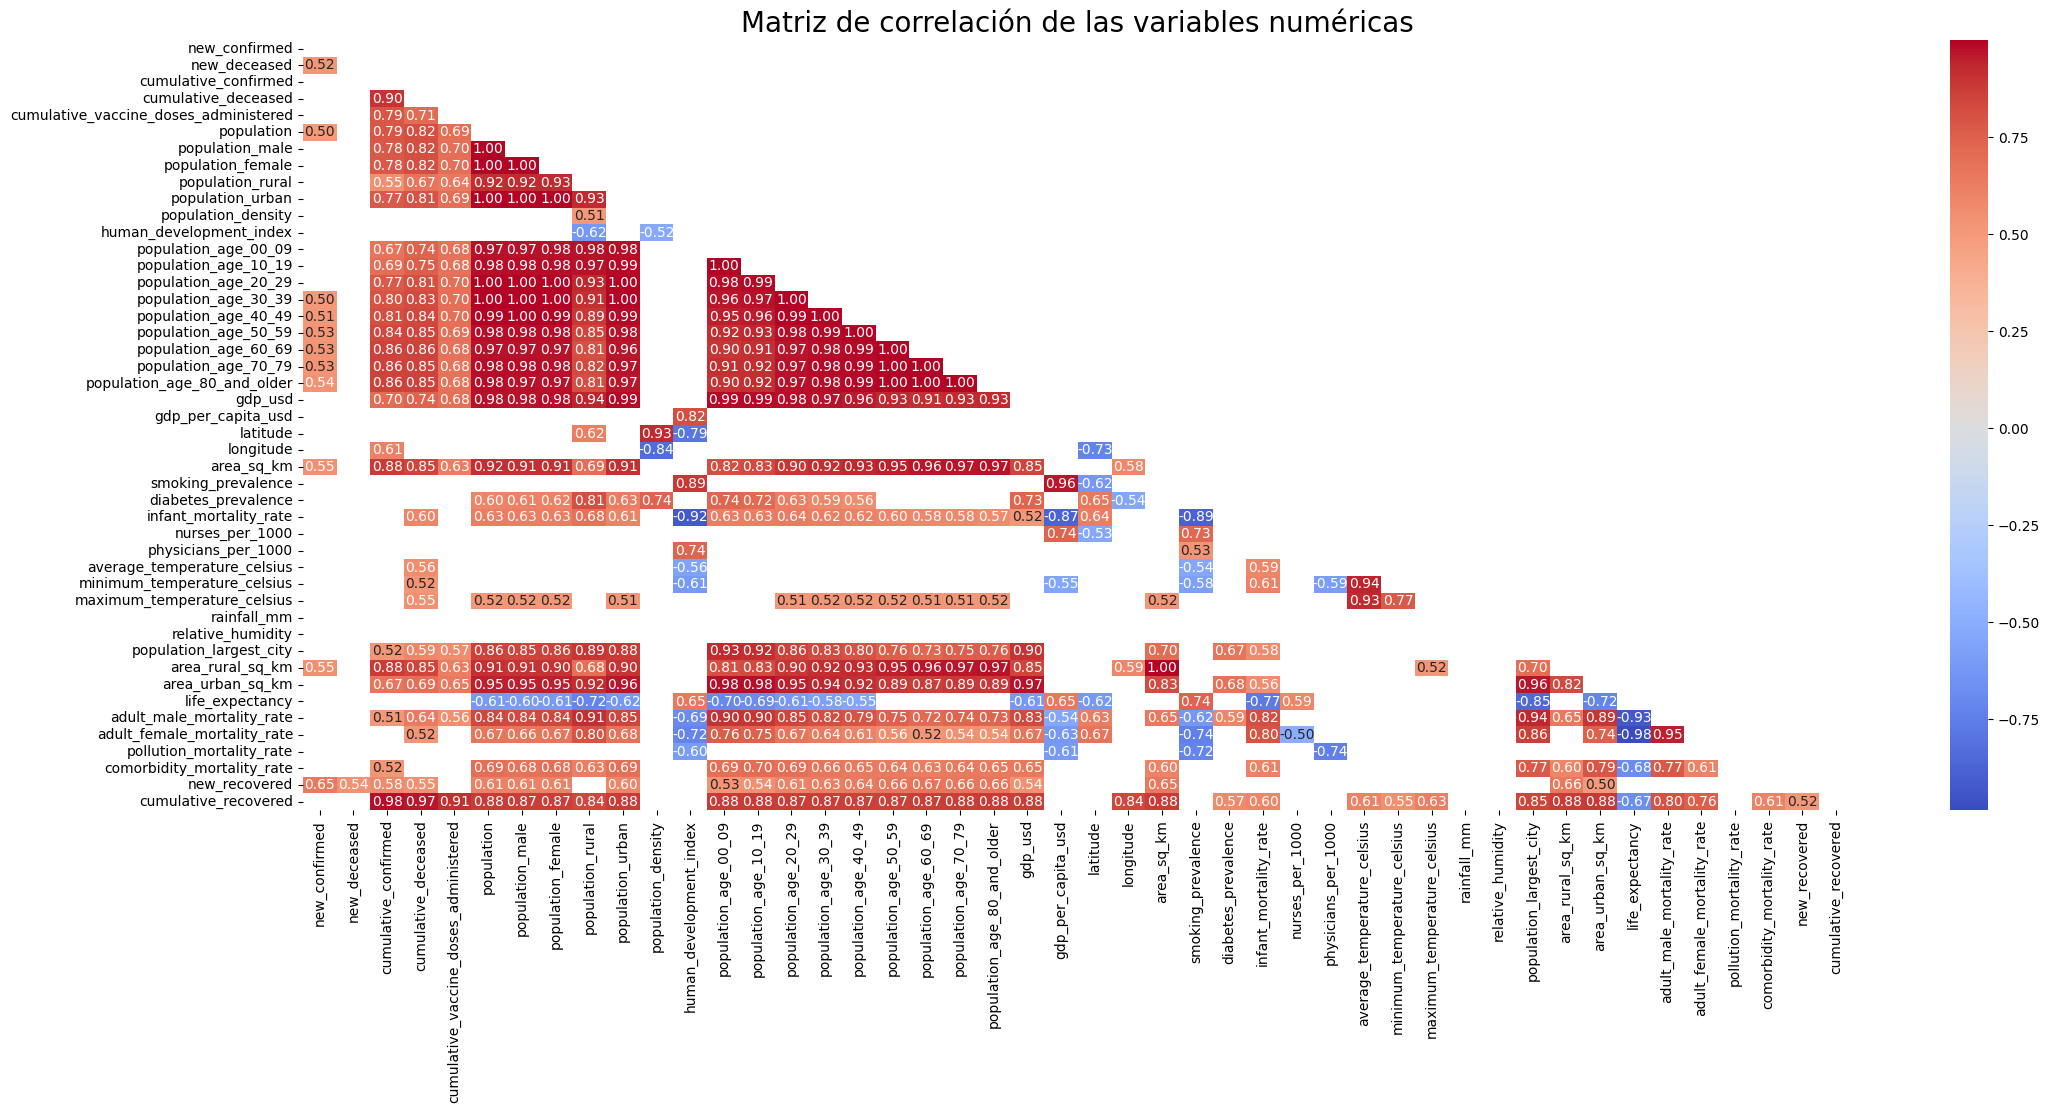

In [25]:
#Se crea la matriz de correlación de las variables numéricas
numeric_columns = data_latinoamerica_paises.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_latinoamerica_paises[numeric_columns].corr()

#Aqui se crea máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Vamos a mostrar valores superiores a 0.5 es decur donde hay una correlación fuerte sin embargo tambien se puede mostrar valores negativos.
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# Se crea la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación de las variables numéricas', fontsize = 20)
plt.show()

En la gráfica anterior se presentan Las variables con mayor correlación, para identificarlas más rápido, se definió un umbral cuyo valor absoluto sea mayor a 0.5 y se graficaron en un Heatmap.

Ya teniendo una idea de las variables que tienen mayor correlación, podría hacer un análisis más detallado de estas variables esto se podría hacer en un análisis posterior y una toma de
decisiones para la creación de un modelo ML.

Sin embargo podemos proceder a realizar una rápida revisión gráfica de la gran mayoría de las columnas para ver como se comportan los datos, para esta primera aproximación vamos a utilizar
barplots utilizando un ciclo for y la librería seaborn.

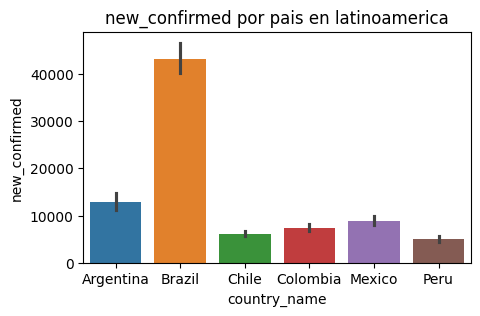

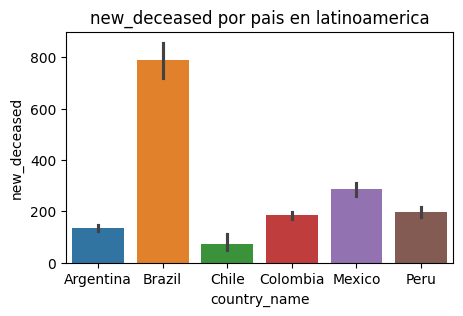

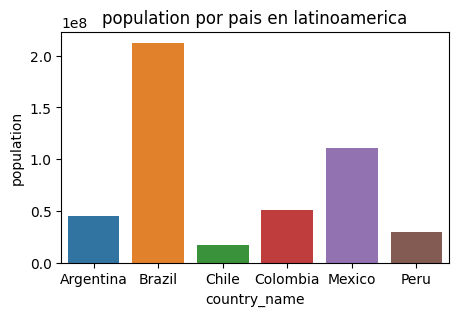

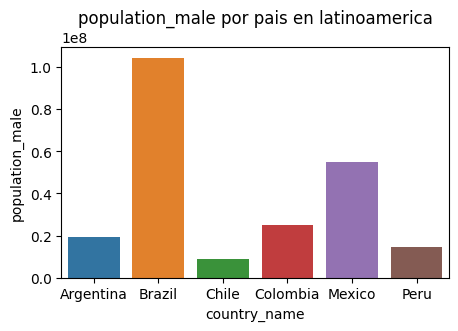

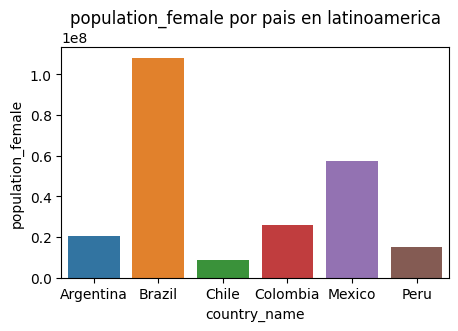

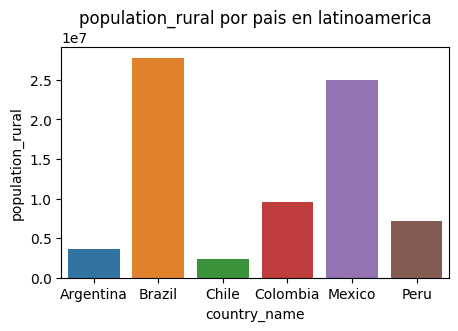

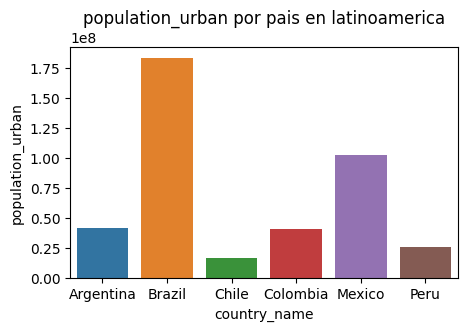

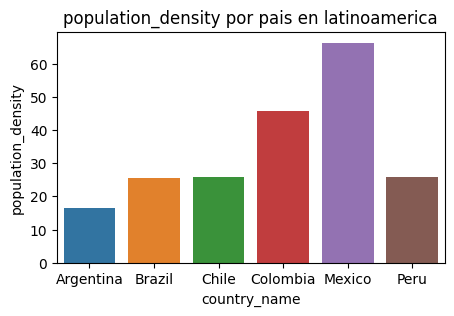

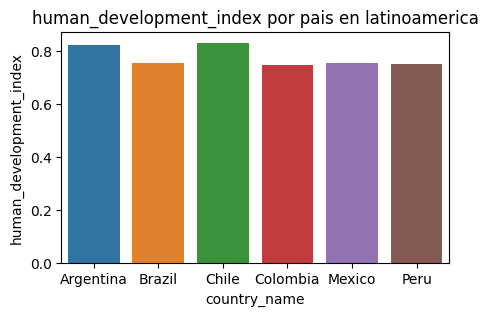

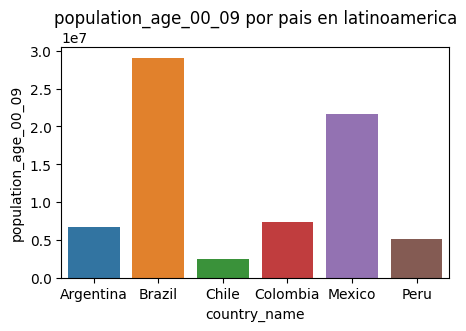

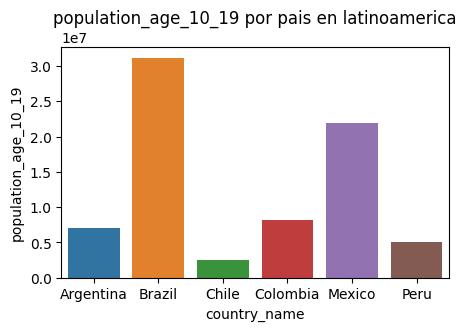

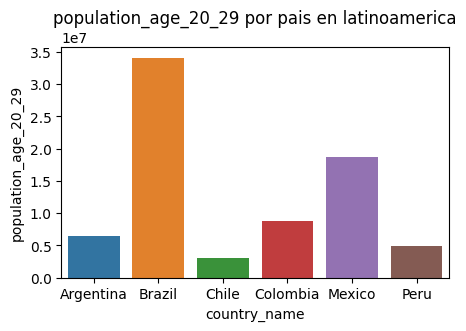

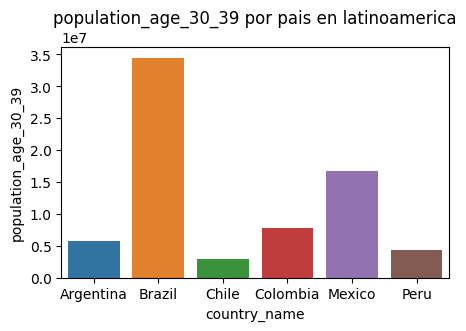

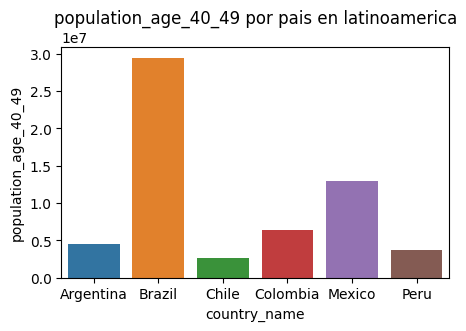

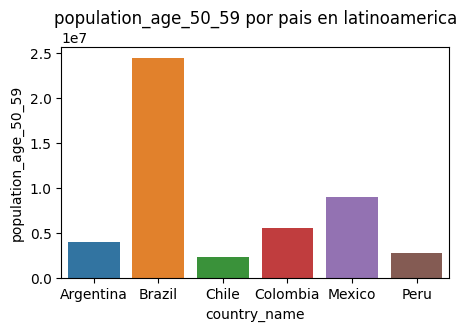

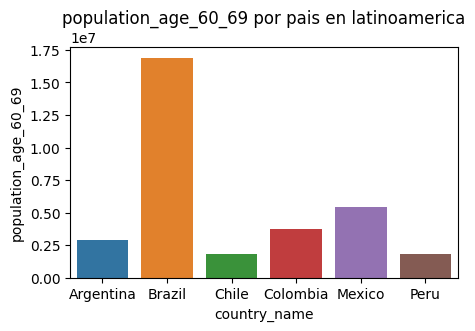

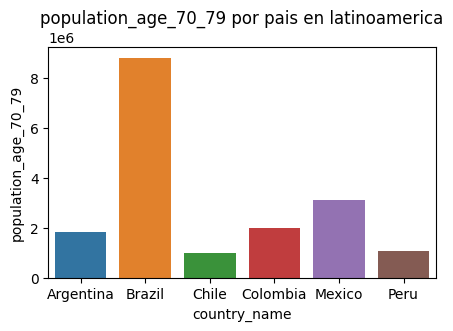

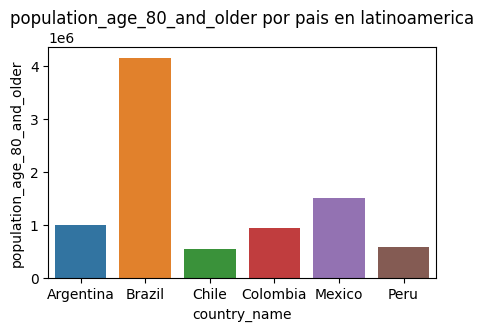

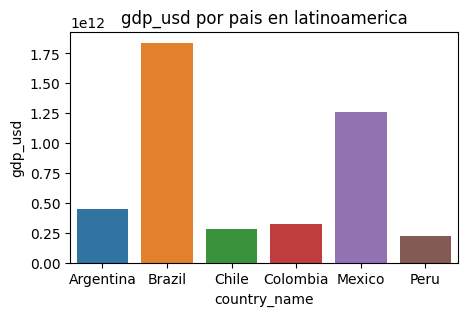

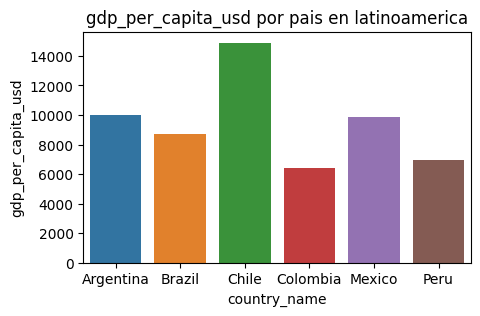

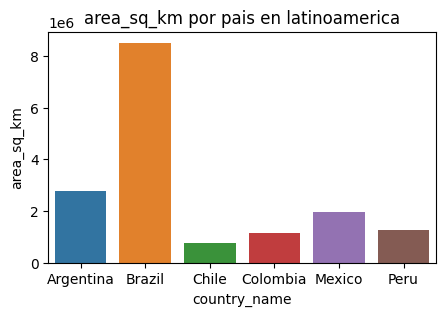

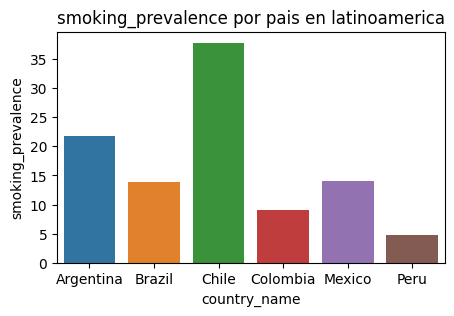

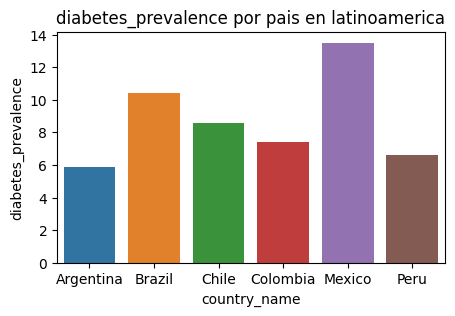

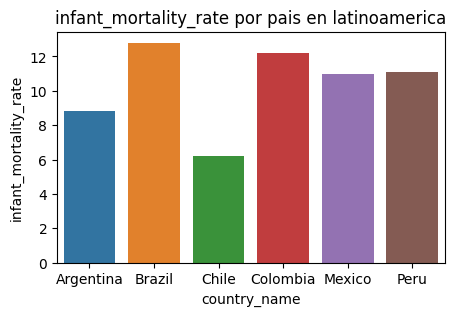

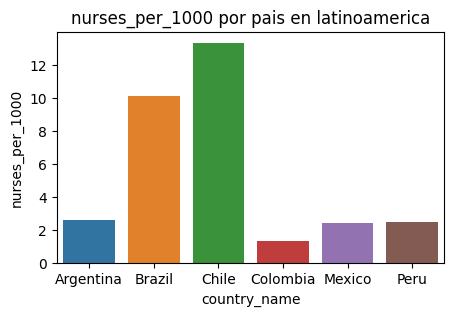

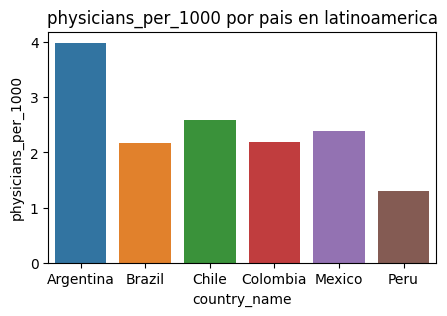

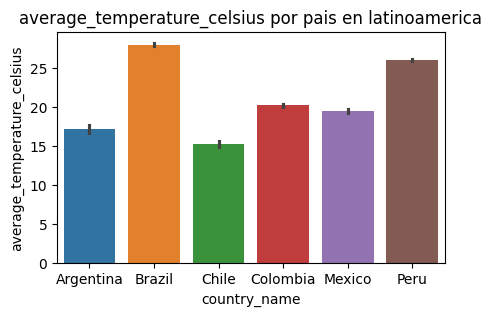

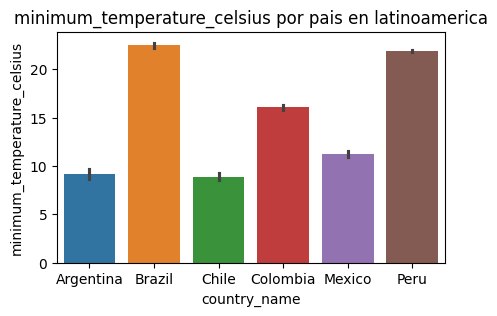

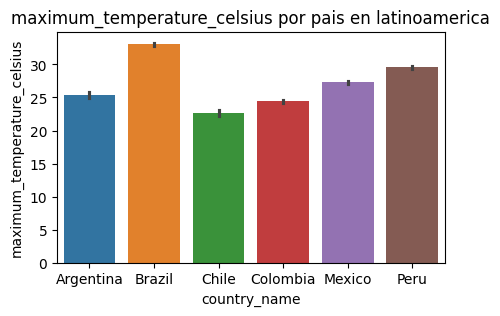

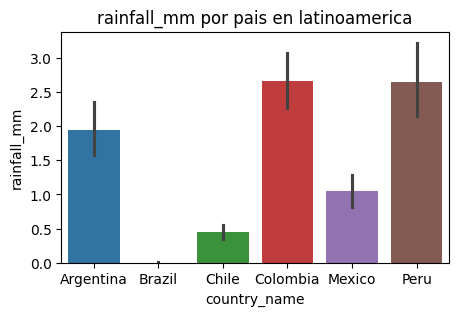

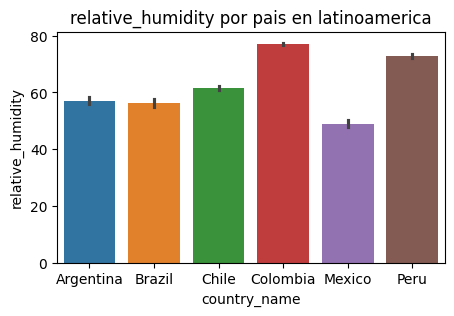

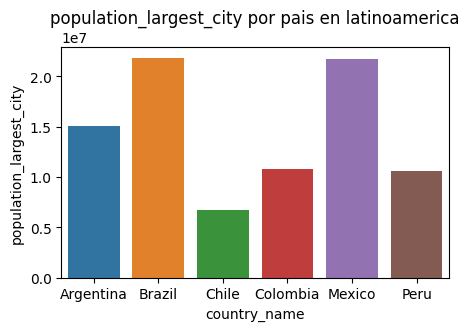

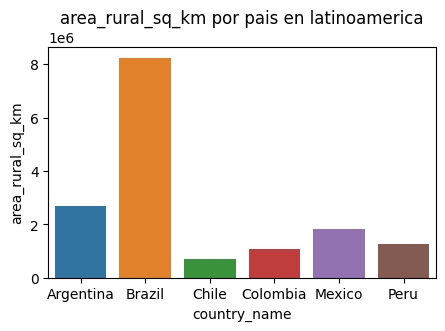

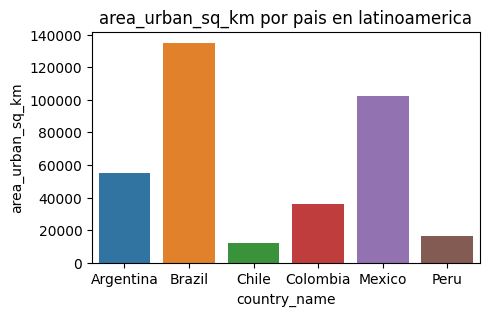

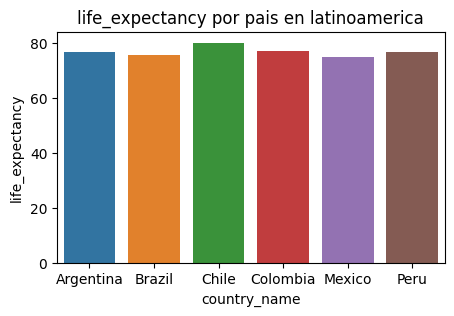

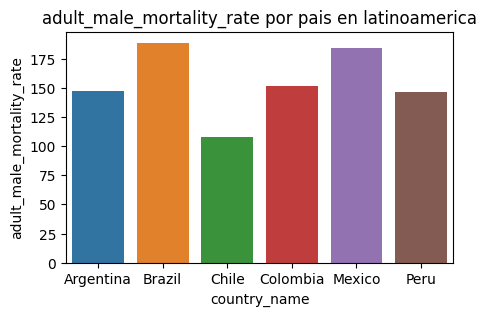

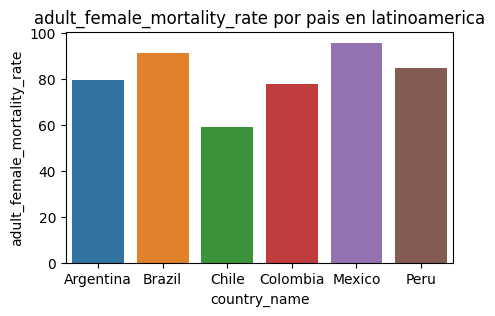

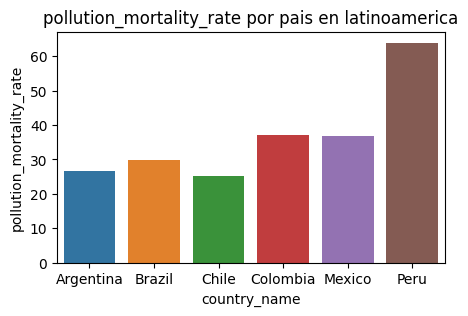

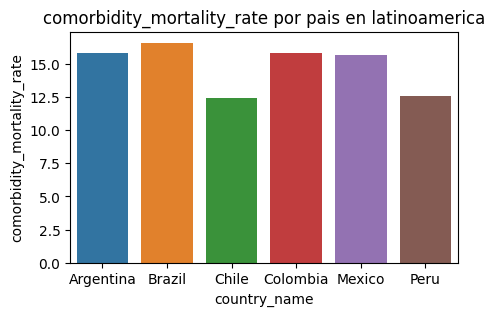

In [ ]:
#data_latinoamerica_paises = data_latinoamerica_paises.reset_index()
# Genera diagramas de barras para cada columna numérica relevante en el DF data_latinoamerica_paises: --> con 6 columnas
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key', 'date', 'country_code', 'country_name', 'latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased',
        'cumulative_recovered', 'cumulative_vaccine_doses_administered', 'new_recovered']:
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.barplot(x='country_name', y=i, data=data_latinoamerica_paises, ax=ax, hue='country_name')
        plt.title(f'{i} por pais en latinoamerica')
        plt.show()

Se repite el proceso con un ciclo for pero ahora vamos a realizar histogramas para ver la distribución de algunos de los datos.

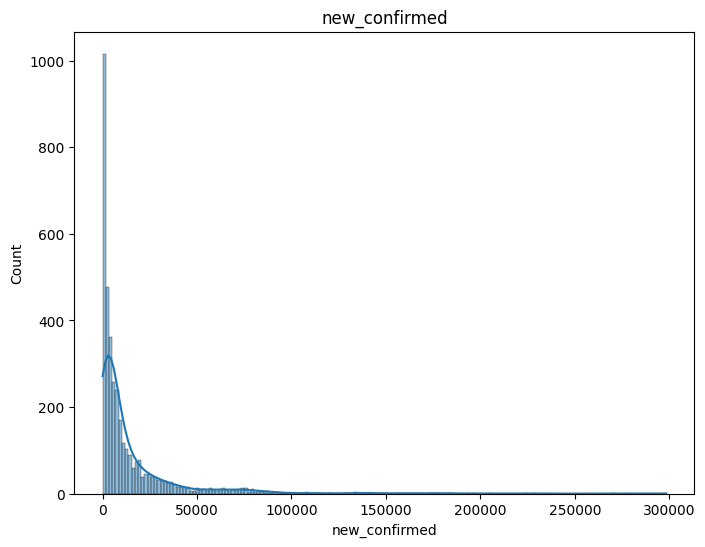

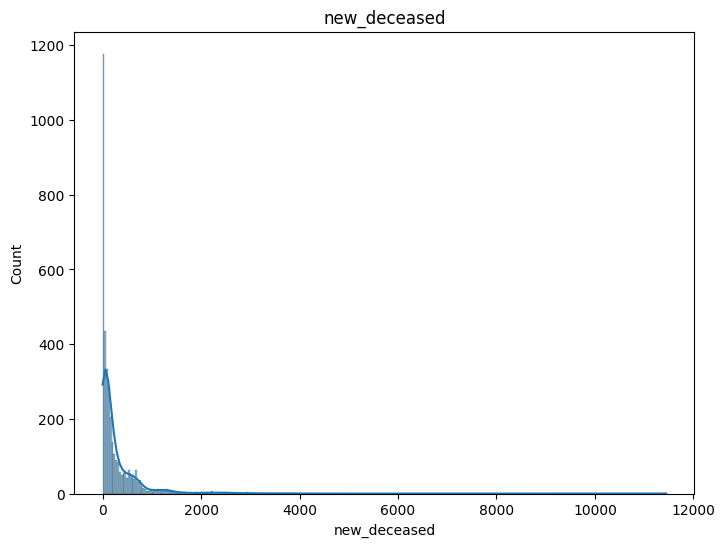

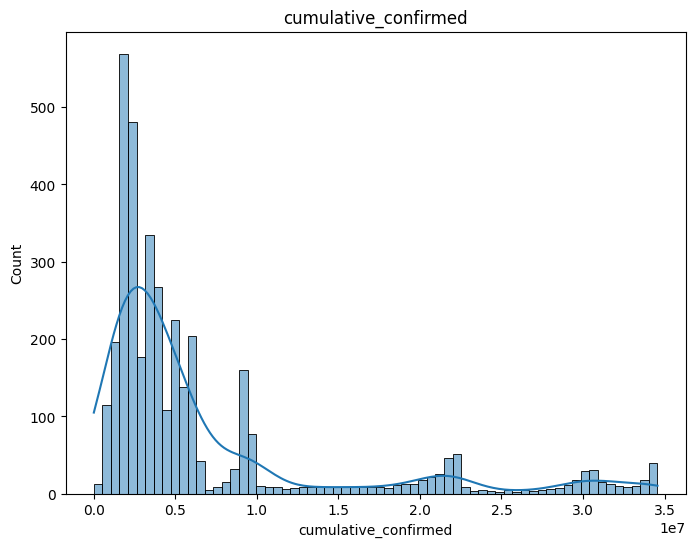

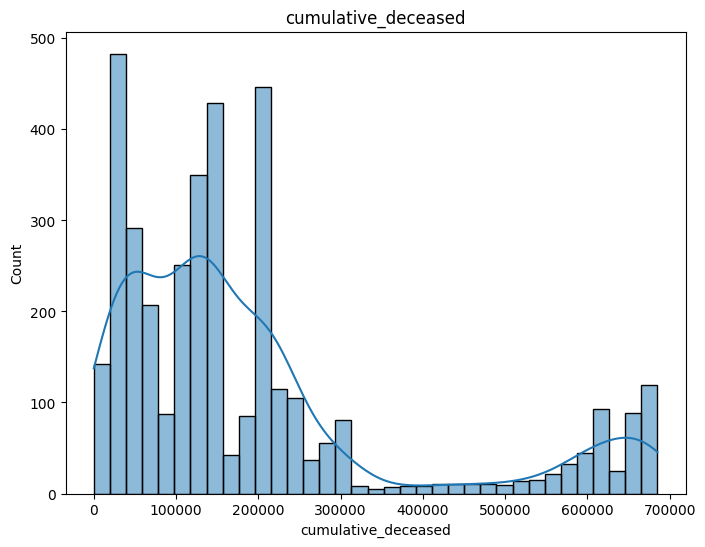

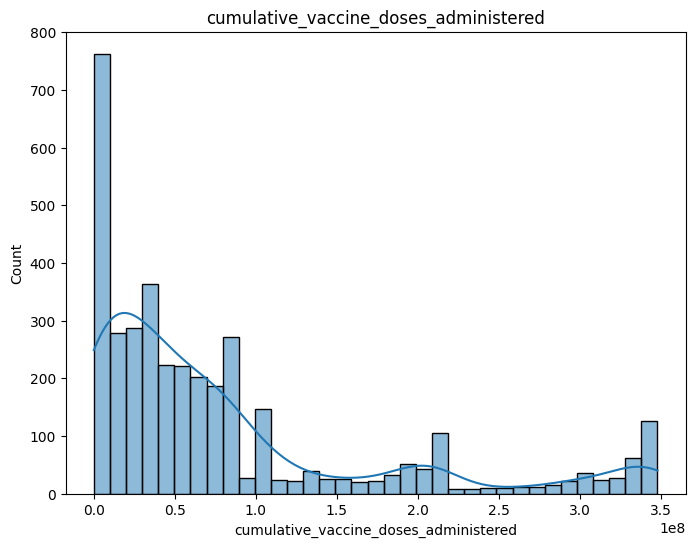

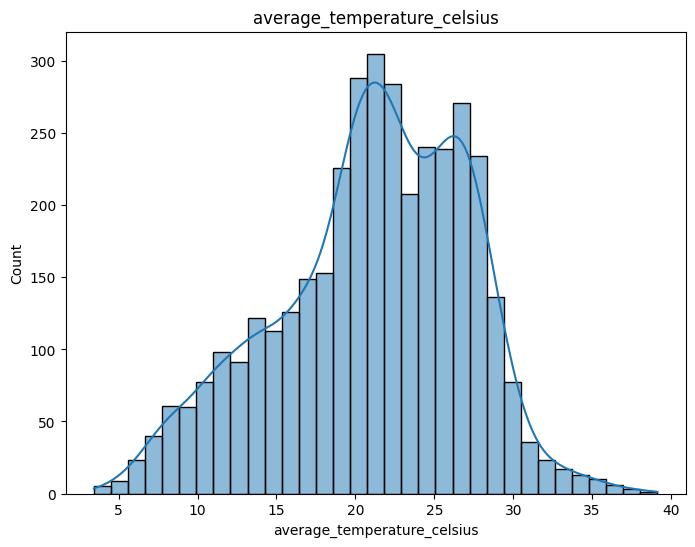

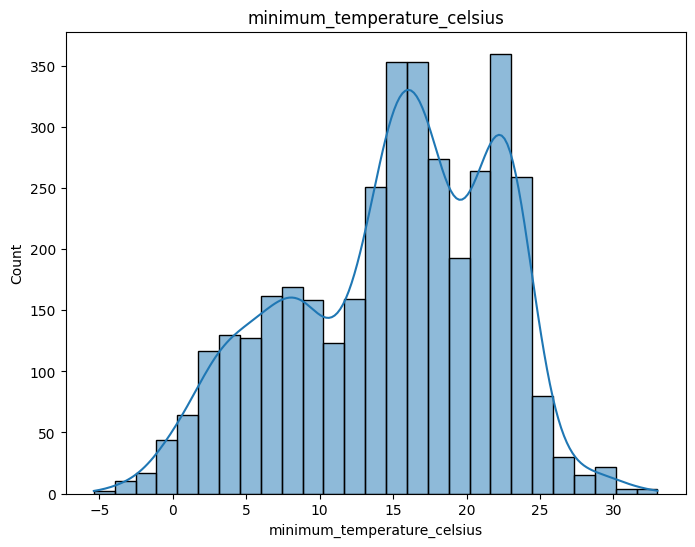

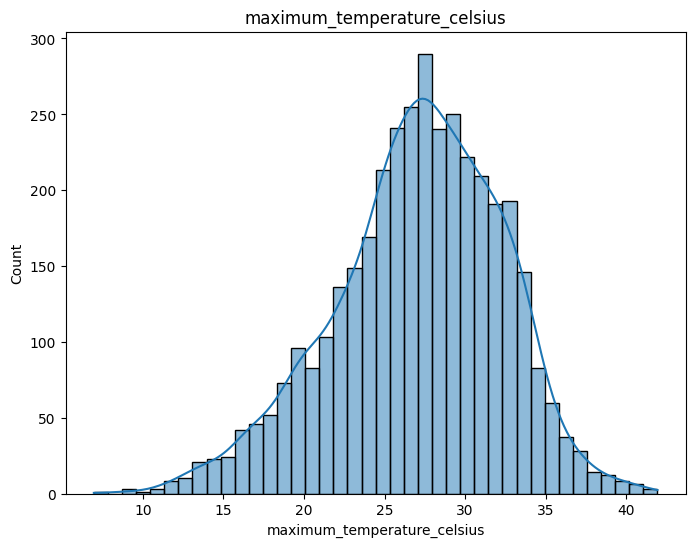

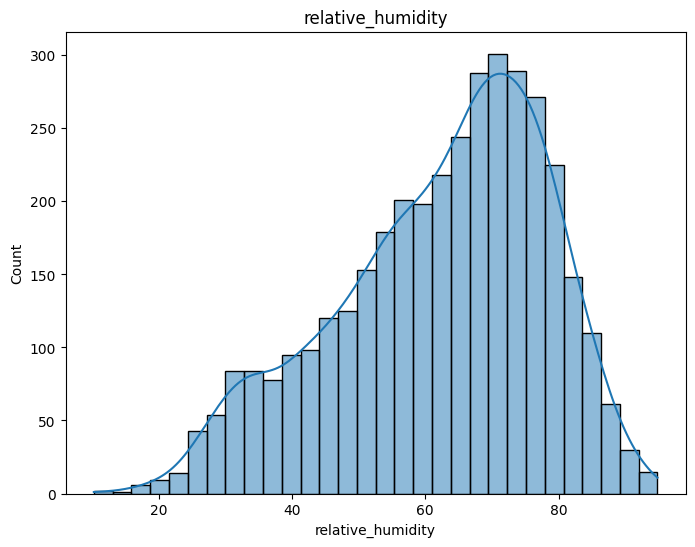

In [27]:
lista_columnas_6 = ["new_confirmed","new_deceased","cumulative_confirmed","cumulative_deceased",
                    "cumulative_vaccine_doses_administered","average_temperature_celsius","minimum_temperature_celsius",
                    "maximum_temperature_celsius","relative_humidity"]
for i in data_latinoamerica_paises[lista_columnas_6]:
    fig, ax = plt.subplots(figsize=(8,6))
    sns.histplot(data_latinoamerica_paises[i], kde=True)
    plt.title(i)
    plt.show()

Procederemos a realizar un analisis enfocados en algunas variables especficicas, en este caso vamos a analizar la variable average_temperature y la variable new_confirmed, con el fin de tratar
de entender el comportamiento de los casos respecto a la temperatura.

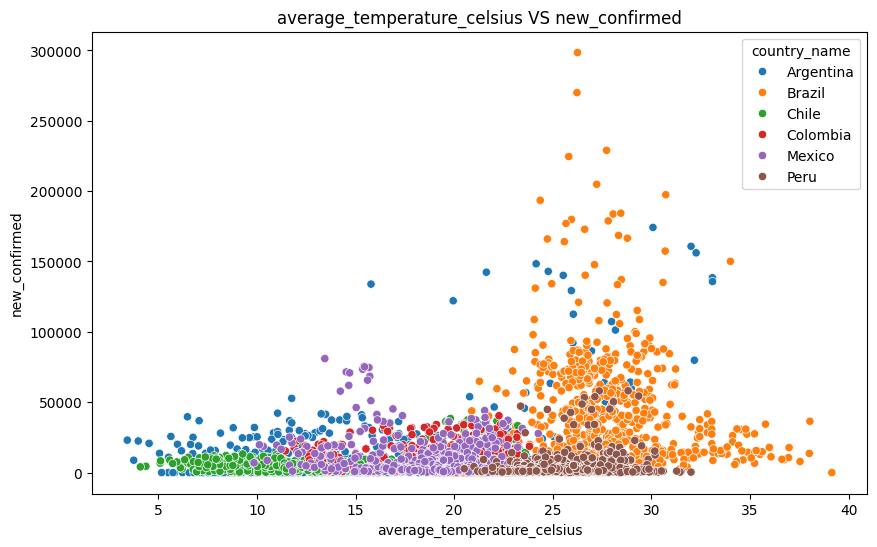

In [28]:
# Grafica de average_temperature_celsius vs new_confirmed
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius VS new_confirmed')
plt.show()

Se ha podido observar que en algunos paises la temperatura no influye en la cantidad de casos confirmados, sin embargo en otros paises si se puede observar una relación entre la temperatura
y la cantidad de casos confirmados.
Como vimos que la temperatura tiene alguna relación con los casos confirmados, vamos a realizar un análisis de la temperatura promedio con la cantidad de muertes.

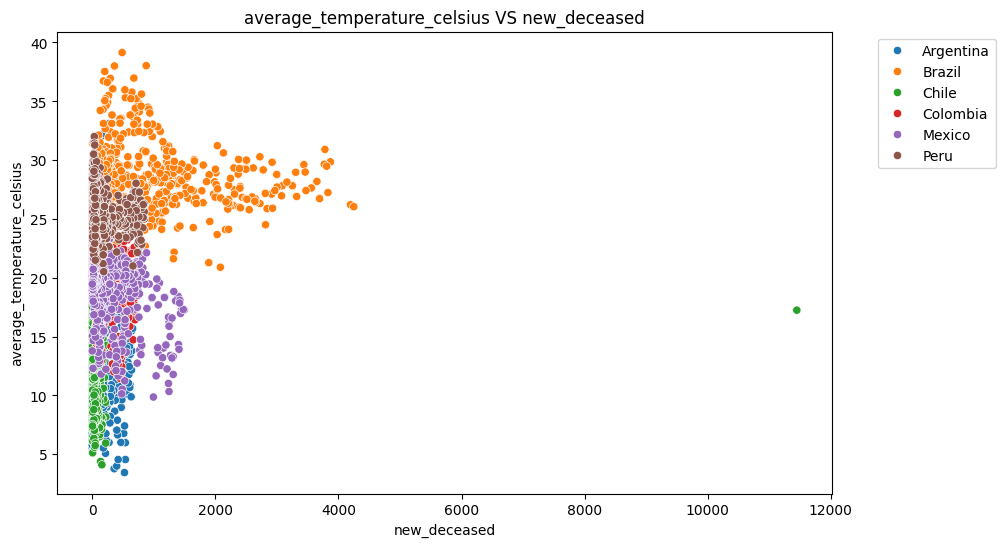

In [29]:
# Grafica de average_temperature_celsius vs new_deceased

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='new_deceased', y='average_temperature_celsius', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius VS new_deceased')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

En la grafica anterior se ve un comportamiento similar al de los casos confirmados, en algunos paises la temperatura no influye en la cantidad de muertes, sin embargo en otros paises si se
puede observar una relación entre la temperatura y la cantidad de muertes.

Ahora si veamos como se comportan las variables en un estudio longitudinal, es decir a 10 largo del tiempo.

Por lo tanto, se hace una primera aproximación y observaremos las dosis administradas por mes en todos los países.

In [ ]:
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True)

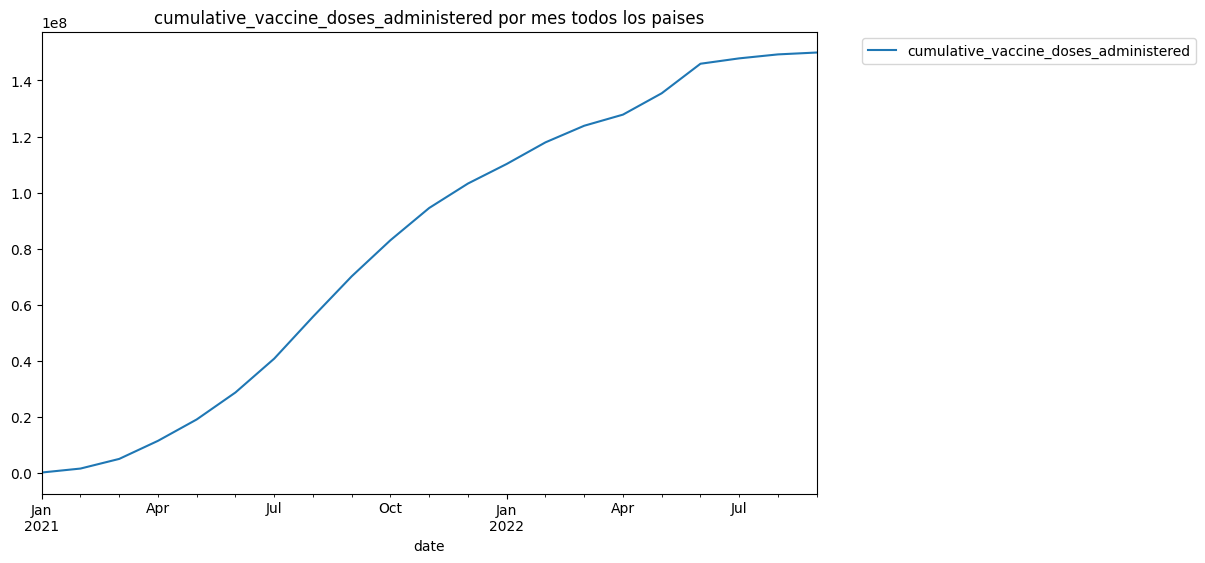

In [30]:
# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('cumulative_vaccine_doses_administered por mes todos los paises')
plt.show()

En la anterior gráfica se puede observar que la cantidad de dosis administradas en los países de Argentina, Brasil, Chile, Colombia, México y Perú ha ido aumentando a 10 largo del tiempo,
recordemos que es un análisis general y no se ha hecho un análisis detallado.

Como la anterior gráfica no nos da mucha información, vamos a realizar un análisis más detallado de las dosis administradas por mes en cada país.

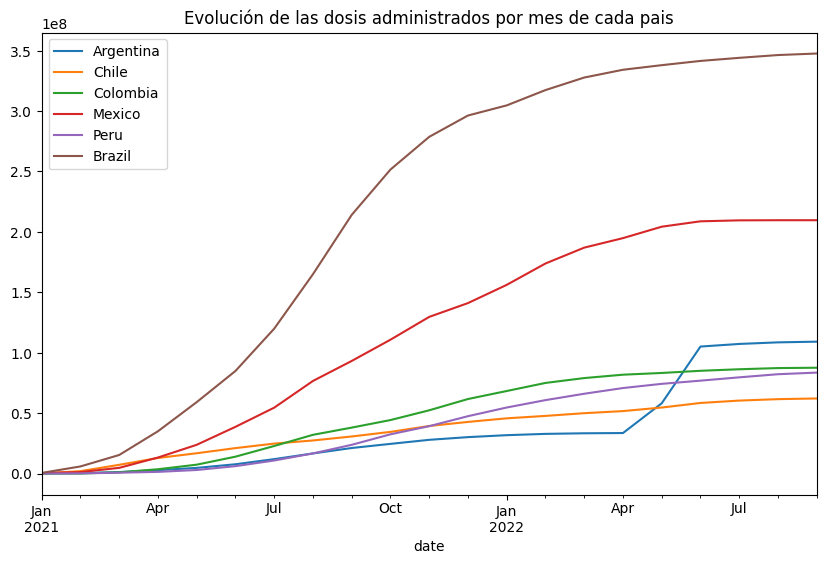

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.title('Evolución de las dosis administrados por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Si realizamos un análisis más detallado de las dosis administradas por mes en cada país, podemos observar que en algunos paises la cantidad de dosis administradas ha ido aumentando a 10
largo del tiempo, sin embargo en otros países la cantidad de dosis administradas ha ido disminuyendo, Esto puede ser debido a muchos factores, como la cantidad de vacunas disponibles, la
cantidad de personas que se han vacunado, entre otros.

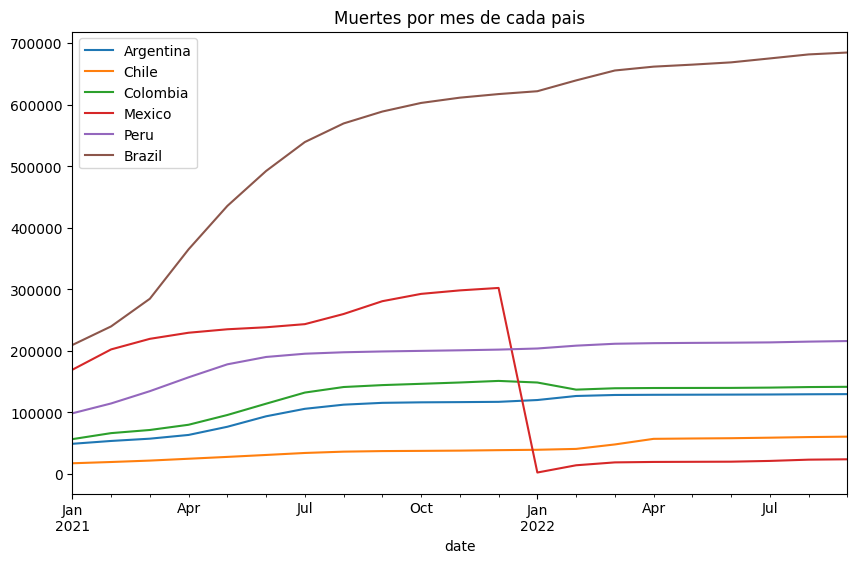

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot()
plt.title('Muertes por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El país que mas muertes ha tenido es Brasil, seguido de México, Colombia, Argentina, Perú y Chile. Sin embargo, esto no quiere decir que estos paises sean los que peor han manejado la pandemia, ya que hay que tener en cuenta la cantidad de habitantes de cada país además de otros factores y cantidad de datos que tenemos.

La disminución de casos en méxico puede ser una perdida de datos o una disminución real de casos, esto se puede analizar en un estudio posterior.

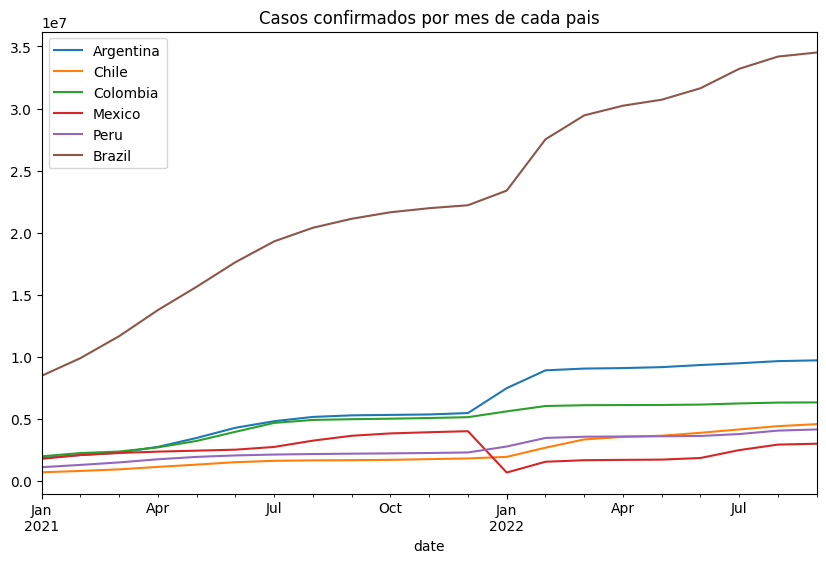

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot()
plt.title('Casos confirmados por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El país que más casos confirmados ha tenido es Brasil, seguido de México, Argentina, Colombia, Chile y Perú. Esto no quiere decir que manejaran peor la pandemia, ya que hay que tener en cuenta la cantidad de habitantes de cada país además de otros factores y cantidad de datos que tenemos.

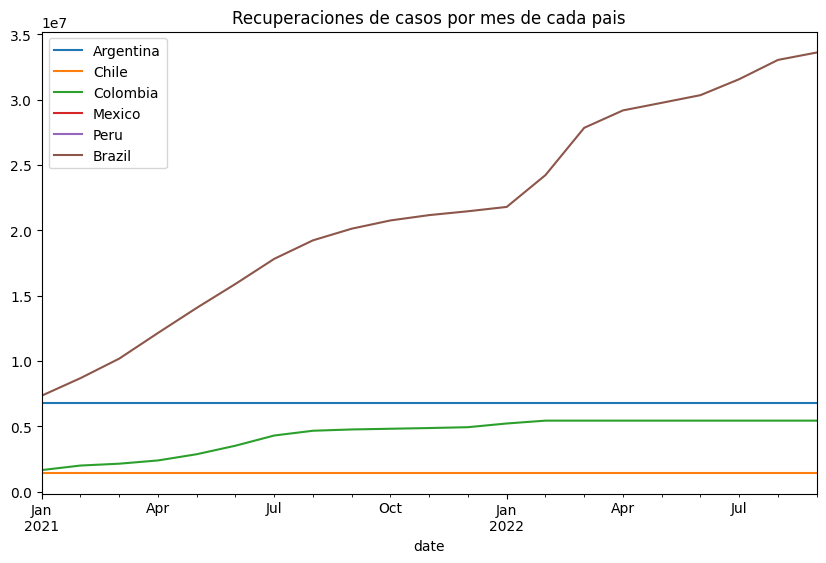

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot()
plt.title('Recuperaciones de casos por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El país que mejor se recupero ha sido Brasil, sin embargo esto como lo dijimos viene relacionado a la cantidad de personas y vacunas disponibles.

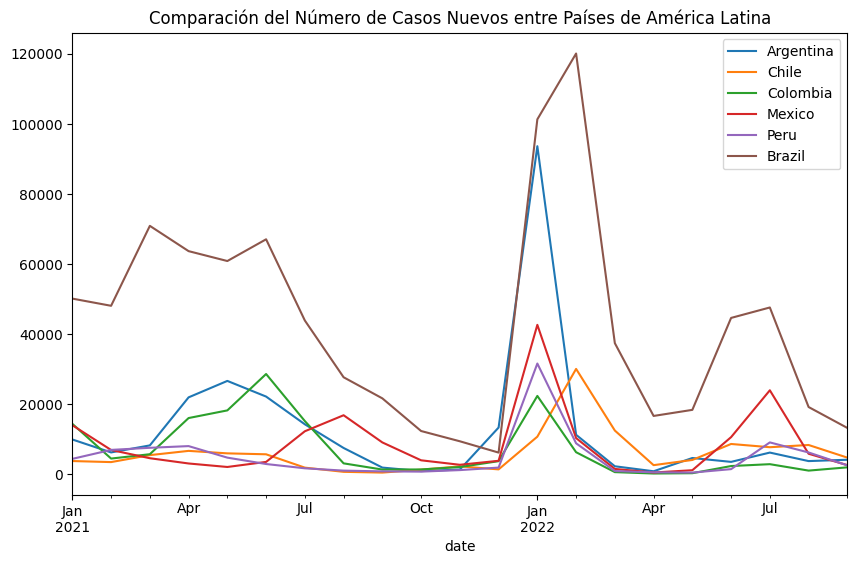

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()
plt.title('Comparación del Número de Casos Nuevos entre Países de América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

De los paises que mejor manejó la pandemia fue Chile, seguido de Perú, Argentina, Colombia, México y Brasil, se puede observar que la cantidad de muertes y casos confirmados es menor en estos paises ademas de no ser tan desproporcionada la cantidad de vacunas administradas.

Text(0.5, 1.0, 'Distribución de dosis acumuladas por país')

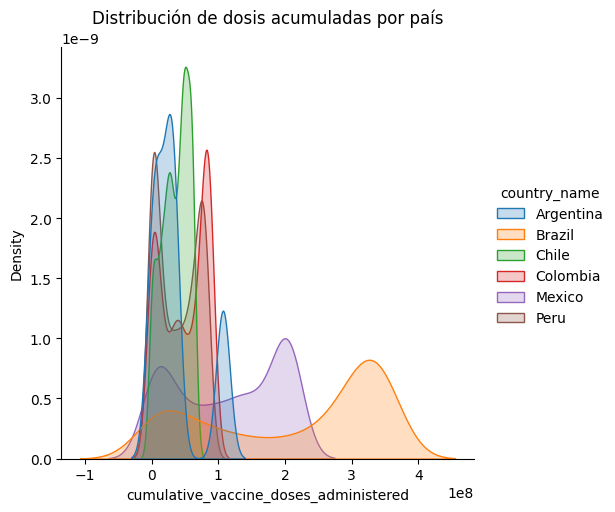

In [36]:
sns.displot(data_latinoamerica_paises, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True)
plt.title('Distribución de dosis acumuladas por país')

De los paises que peor manejaron la pandemia fue Brasil, seguido de México, Colombia, Argentina, Perú y Chile, se puede observar que la cantidad de muertes y casos confirmados es mayor en estos paises ademas de ser desproporcionada la cantidad de vacunas administradas.

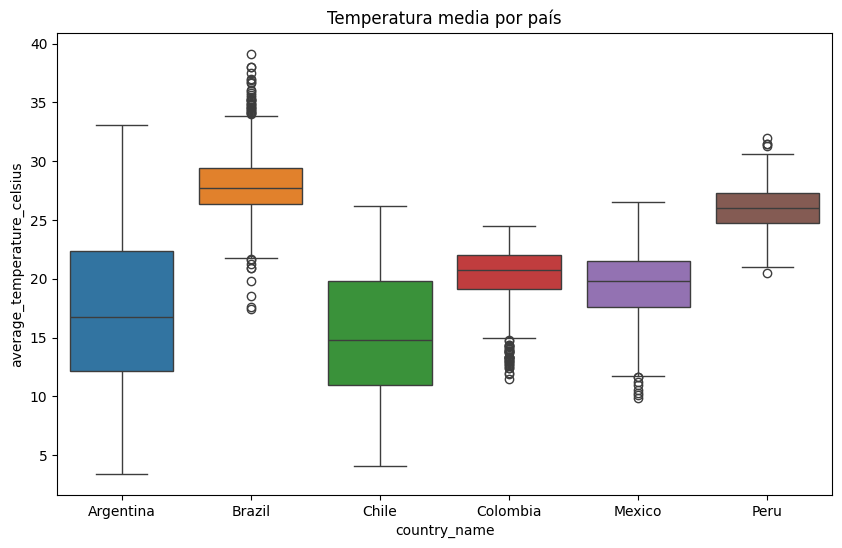

In [37]:
#average_temperature_celsius vs new_confirmed por pais boxplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=data_latinoamerica_paises, hue='country_name')
plt.title('Temperatura media por país')
plt.show()

Aunque chile tiene rangos diferentes de temperatura y eso podría haber afectado la cantidad de casos confirmados y muertes, se puede observar que chile ha manejado mejor la pandemia que los demás paises.

Esto poco a poco nos ha llevado a concluir que los paises donde se podría crear los nuevos centros serían donde hay mas casos confirmados y muertes, ya que es donde se necesita más ayuda.

Pese a nuestro anterior análisis, no podemos tomar una decisión definitiva, ya que no hemos hecho un análisis detallado de los datos, por lo que se recomienda hacer un análisis más detallado y un estudio de los datos para poder tomar una decisión más acertada.
Seguiremos viendo como se comportan las variables de a traves de violinplots.

In [39]:
data_latinoamerica_paises = data_latinoamerica_paises.reset_index()

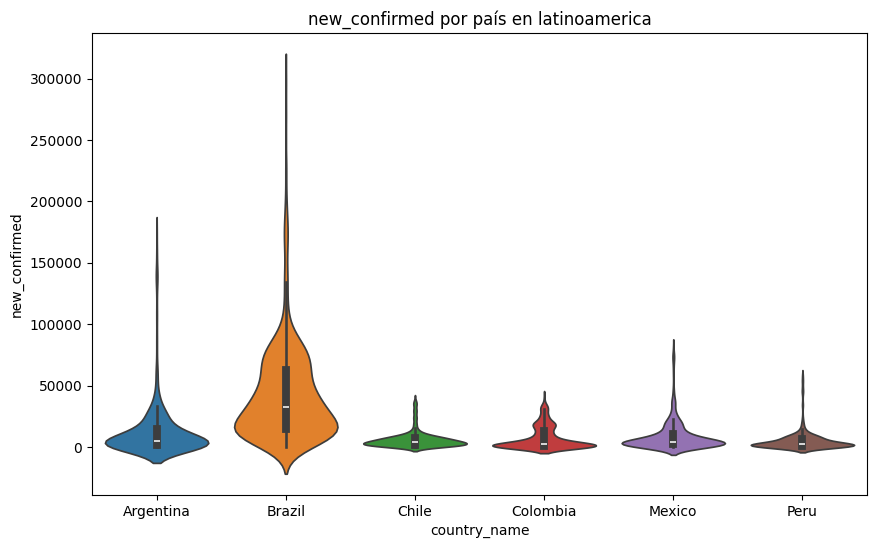

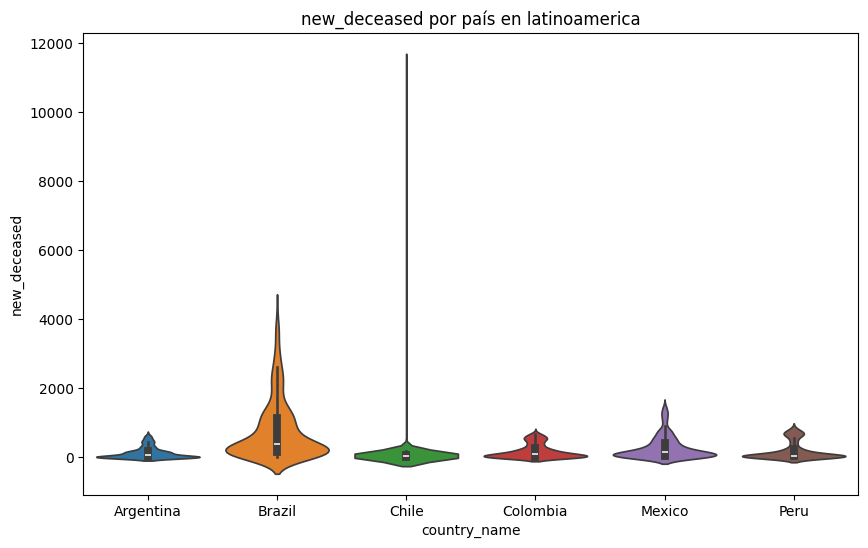

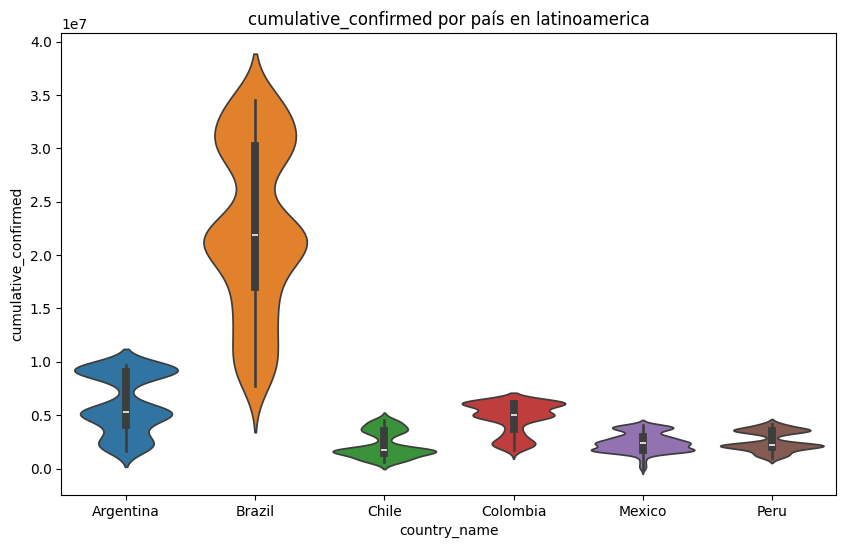

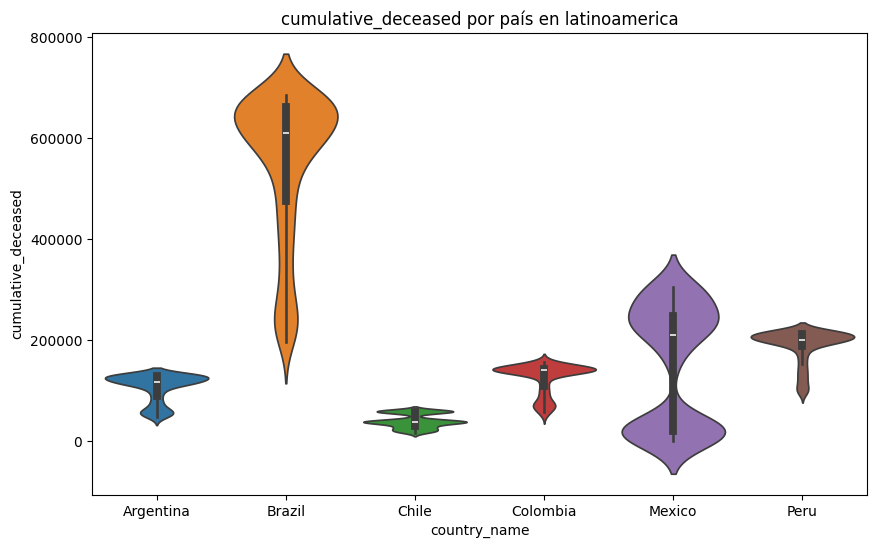

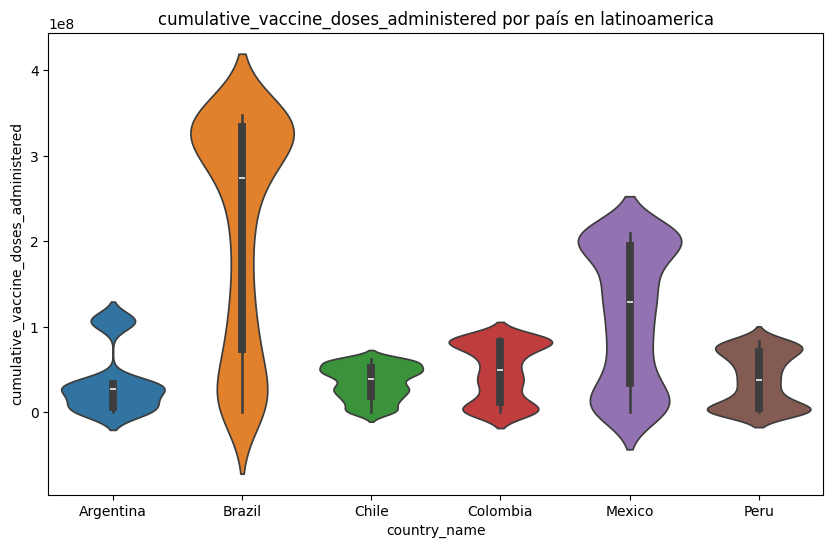

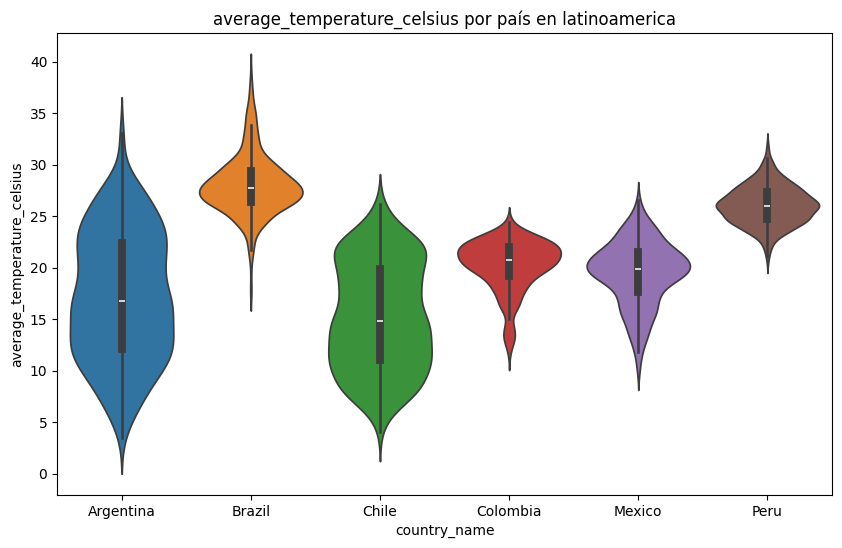

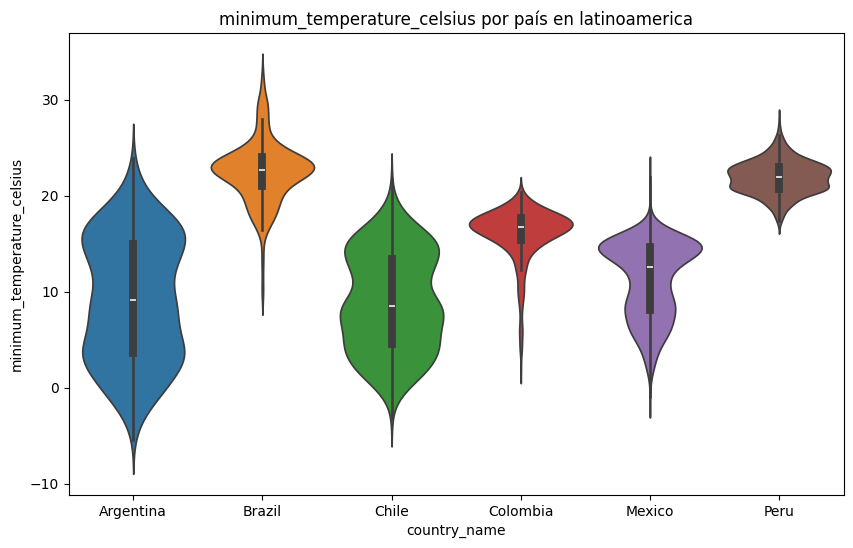

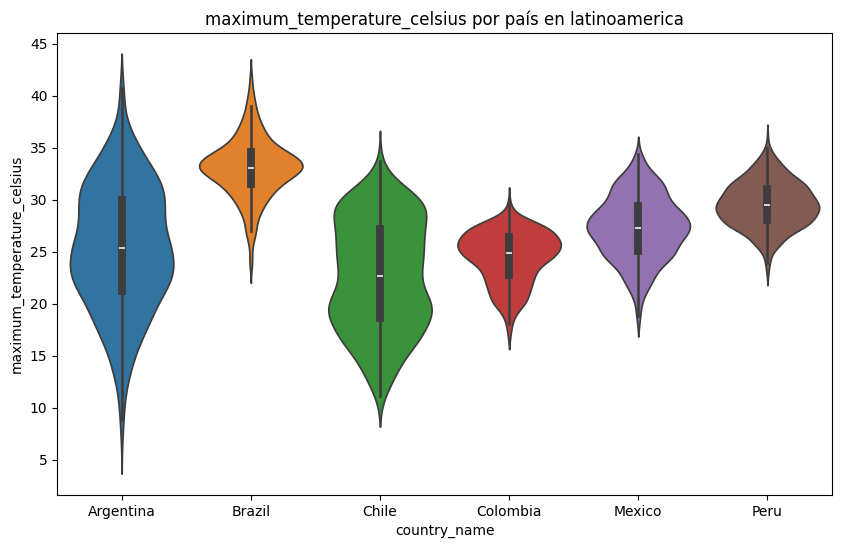

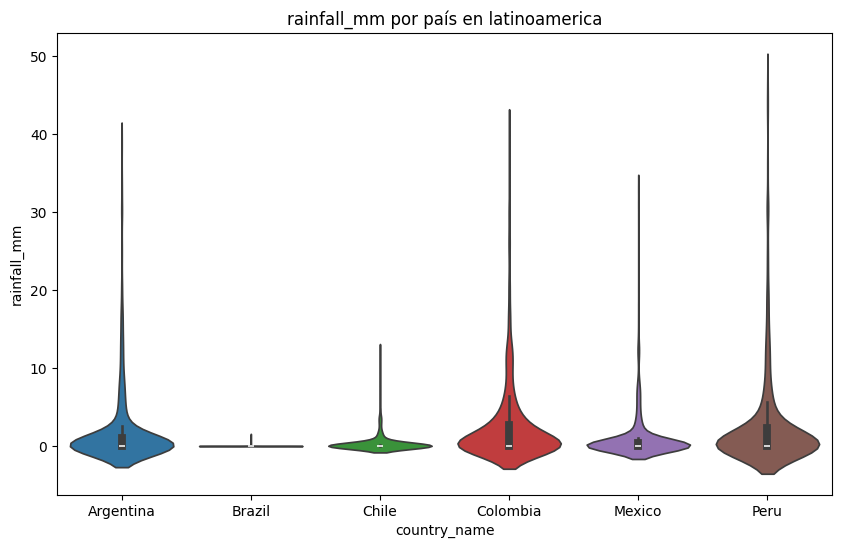

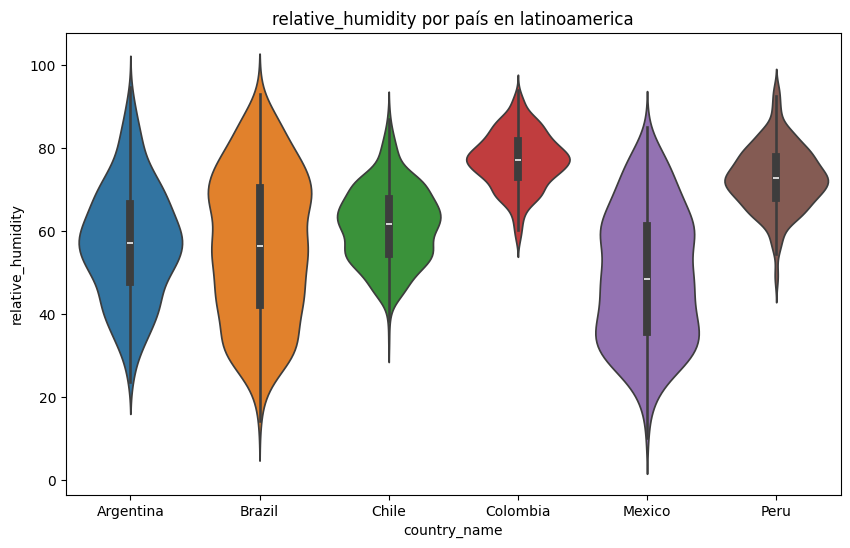

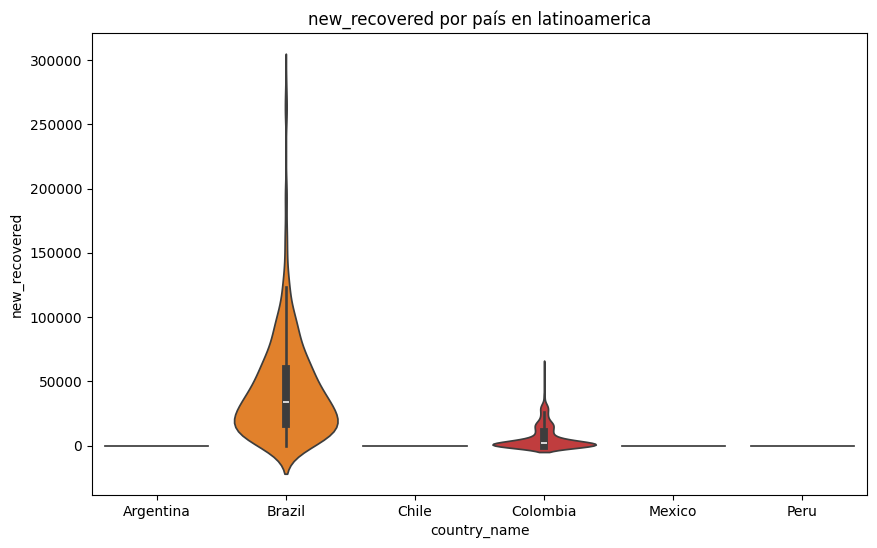

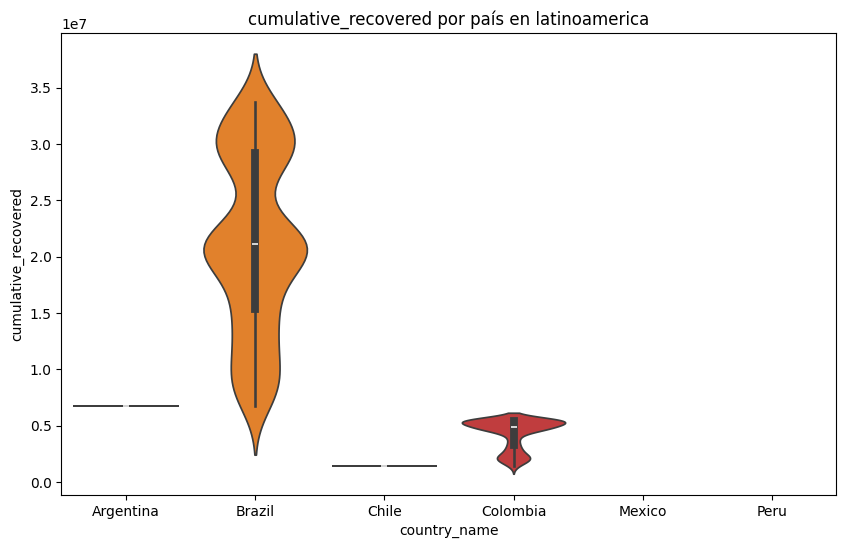

In [40]:
# Se crea un dataframe con las columnas mayores a 6 porque son las que tienen valores diferentes para cada país.
columnas_mayores_6=[]
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','latitude','longitude']:
        if data_latinoamerica_paises[i].nunique()>6:
            columnas_mayores_6.append(i)
#agregar a columnas_mayores_6 la columna country_name para poder hacer analisis por país.
columnas_mayores_6.append('country_name')

# Se crea un dataframe con las columnas mayores a 6
data_latinoamerica_paises_mayores_6=data_latinoamerica_paises[columnas_mayores_6]


# violinplot en todos los paises para variables numericas
for i in data_latinoamerica_paises_mayores_6.columns:
    if i not in ['location_key','date','country_code','latitude','longitude','country_name']:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=i, data=data_latinoamerica_paises_mayores_6,hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()

In [41]:
#configurar el formato de visualización de números decimal 2 cifras
pd.set_option('display.float_format', '{:.2f}'.format)

In [42]:
# Analiza la distribución de la población por grupos de edad
cut_columns = ['country_name','population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
last_cases = data_latinoamerica_paises[cut_columns].groupby('country_name').last().sort_values(by='population_age_00_09')
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = last_cases[age_columns].sum()
age_distribution

population_age_00_09          72354498.00
population_age_10_19          75821668.00
population_age_20_29          75953404.00
population_age_30_39          72153175.00
population_age_40_49          59596656.00
population_age_50_59          47961620.00
population_age_60_69          32654396.00
population_age_70_79          17789478.00
population_age_80_and_older    8711719.00
dtype: float64

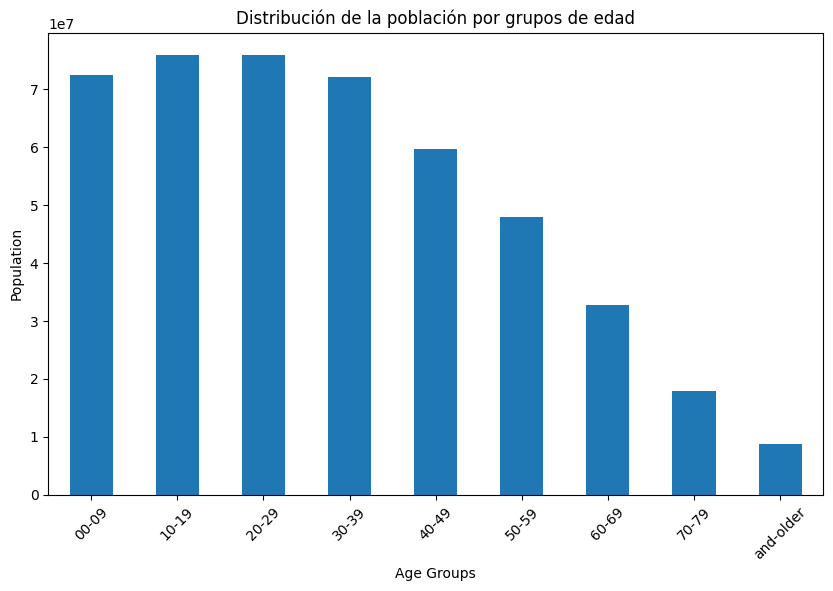

In [43]:
# Calculamos la distribucion de la poblacion por grupos de edad

cut_columns = ['country_name','population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
last_cases = data_latinoamerica_paises[cut_columns].groupby('country_name').last().sort_values(by='population_age_00_09')
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = last_cases[age_columns].sum()

plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(age_columns)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns], rotation=45)

plt.show()

Esta gráfica es interesante porque nos permite ver la población por grupos de edad en cada país, 10 que nos puede ayudar a entender cómo se comporta la población y también nos genera la idea de que
podríamos graficar la cantidad de vacunas por cada grupo etario.

In [45]:
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True)

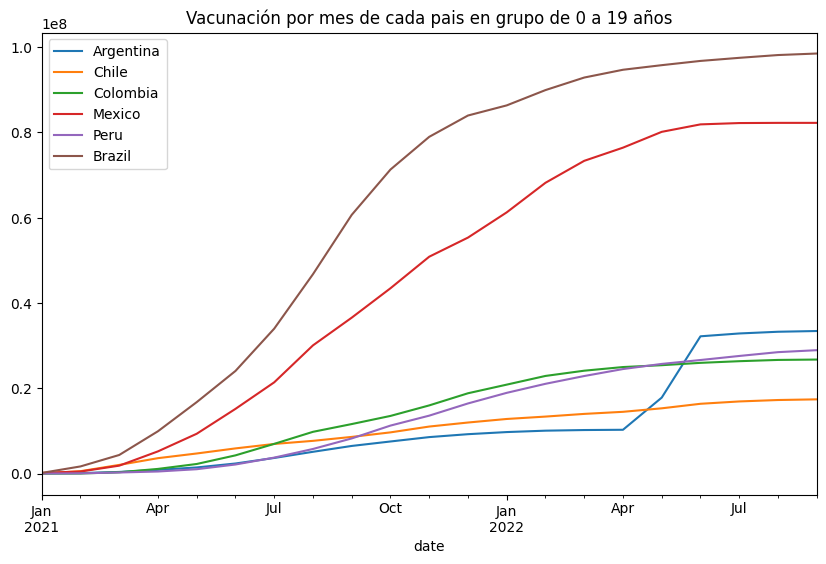

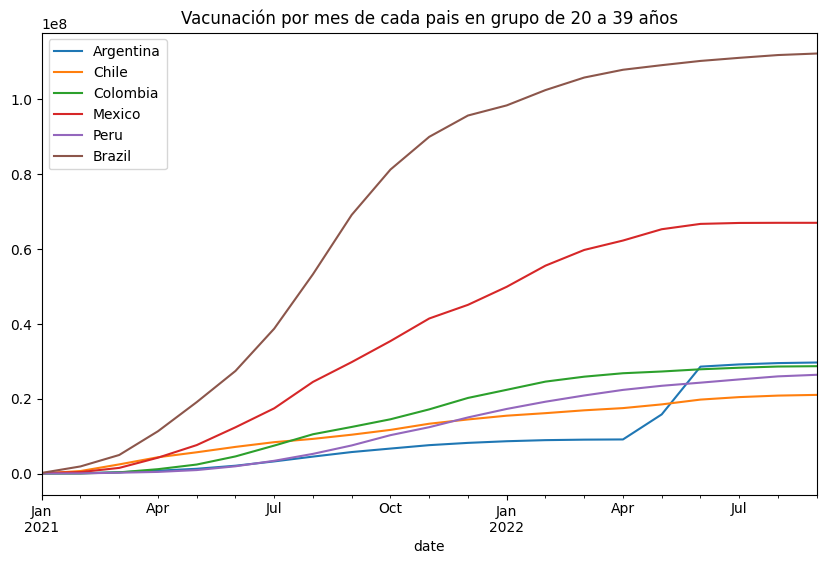

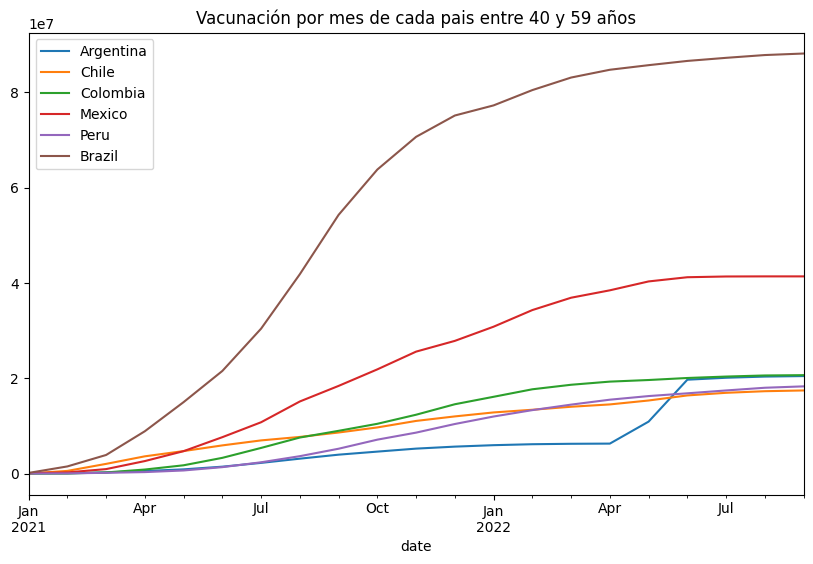

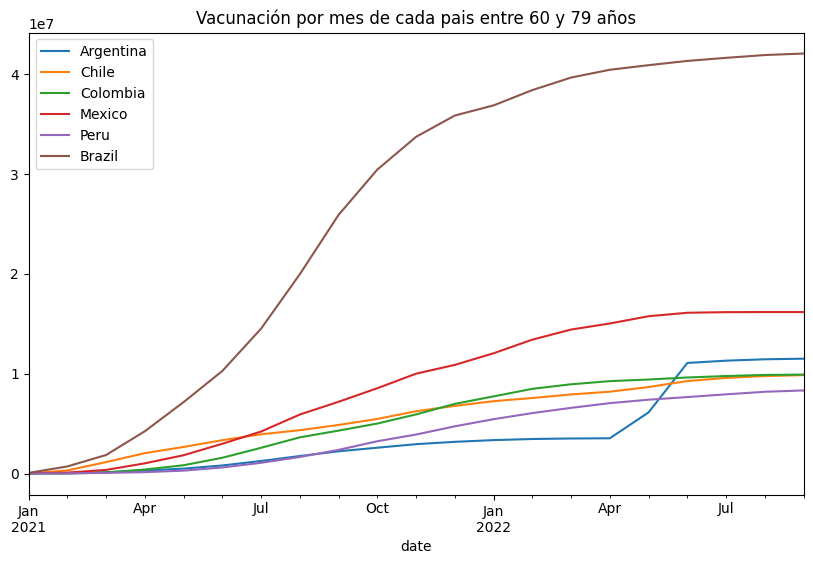

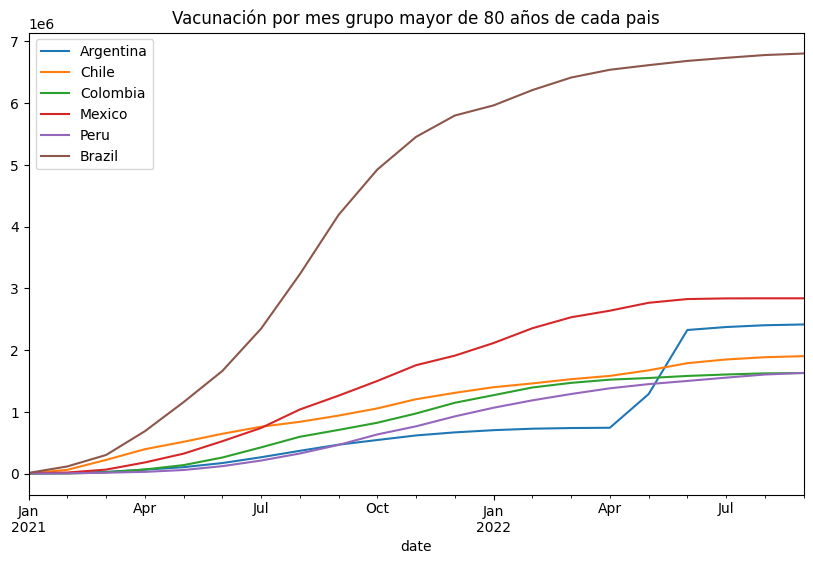

In [ ]:
# Calcula el número de vacunados en varios grupos de edad y genera gráficos de líneas para visualizar la evolución de la vacunación mensual en cada grupo de edad para diferentes países.
data_latinoamerica_paises['population_age_00_19']=data_latinoamerica_paises['population_age_00_09']+data_latinoamerica_paises['population_age_10_19']
data_latinoamerica_paises['population_age_20_39']=data_latinoamerica_paises['population_age_20_29']+data_latinoamerica_paises['population_age_30_39']
data_latinoamerica_paises['population_age_40_59']=data_latinoamerica_paises['population_age_40_49']+data_latinoamerica_paises['population_age_50_59']
data_latinoamerica_paises['population_age_60_79']=data_latinoamerica_paises['population_age_60_69']+data_latinoamerica_paises['population_age_70_79']
data_latinoamerica_paises['population_age_80_and_older']=data_latinoamerica_paises['population_age_80_and_older']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_00_19']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_20_39']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_40_59']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_60_79']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_80_and_older']/data_latinoamerica_paises['population']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].fillna(0)

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].astype(int)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].astype(int)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].astype(int)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].astype(int)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].astype(int)

data_latinoamerica_paises['population_age_00_19_vacunados'].sum()
data_latinoamerica_paises['population_age_20_39_vacunados'].sum()
data_latinoamerica_paises['population_age_40_59_vacunados'].sum()
data_latinoamerica_paises['population_age_60_79_vacunados'].sum()
data_latinoamerica_paises['population_age_80_and_older_vacunados'].sum()

# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 0 a 19 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 20 a 39 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 40 y 59 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 60 y 79 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()
plt.title('Vacunación por mes grupo mayor de 80 años de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Revisemos la mortalidad por genero para identificar la población más vulnerable en cada país, con esto ya podriamos tener una idea de cuál serían la población a vacunar primero.

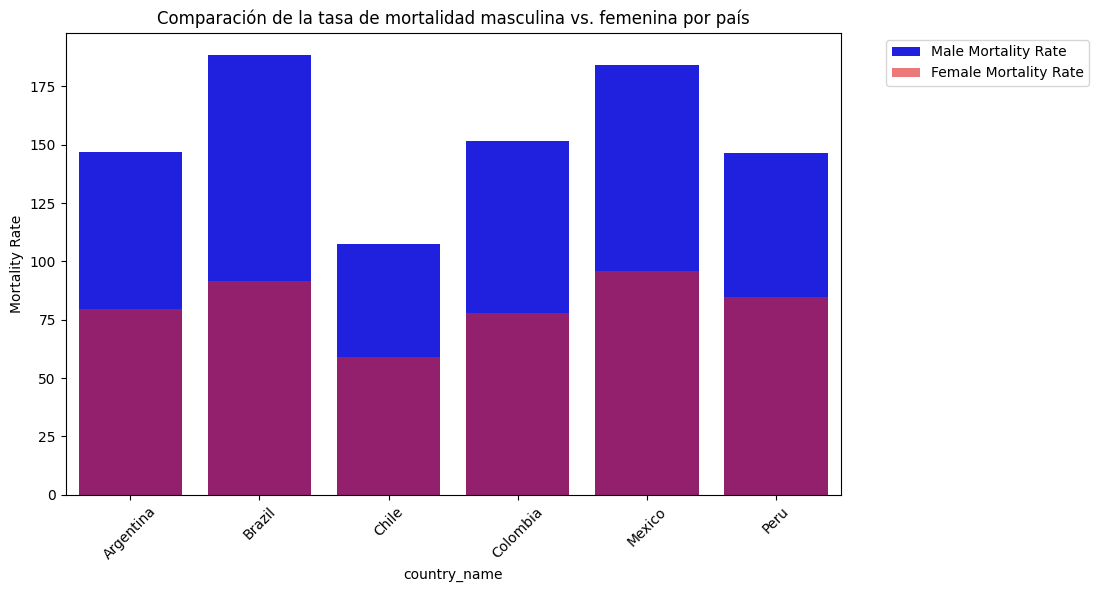

In [47]:
# Grafica de mortalidad por genero. Tasa de Mortalidad entendida en Cantidad de muertes cada 1.000.000 de habitantes

plt.figure(figsize=(10, 6))
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_male_mortality_rate', color='blue', label='Male Mortality Rate')
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_female_mortality_rate', color='red', alpha=0.6, label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

De acuerdo a la gráfica de mortalidad, se puede observar que en todos los paises la cantidad de muertes es mayor en los hombres que en las mujeres, por lo que se podría decir que los hombres son más vulnerables a la enfermedad o están menos protegidos.

Y si vemos las enfermedades preexistentes o comorbilidades? Podríamos ver si hay alguna enfermedad que sea más común en los paises seleccionados y que haya causado más muertes.

Veamos a ver si existe de una manera mas detallada la variables y la correlación entre ellas.

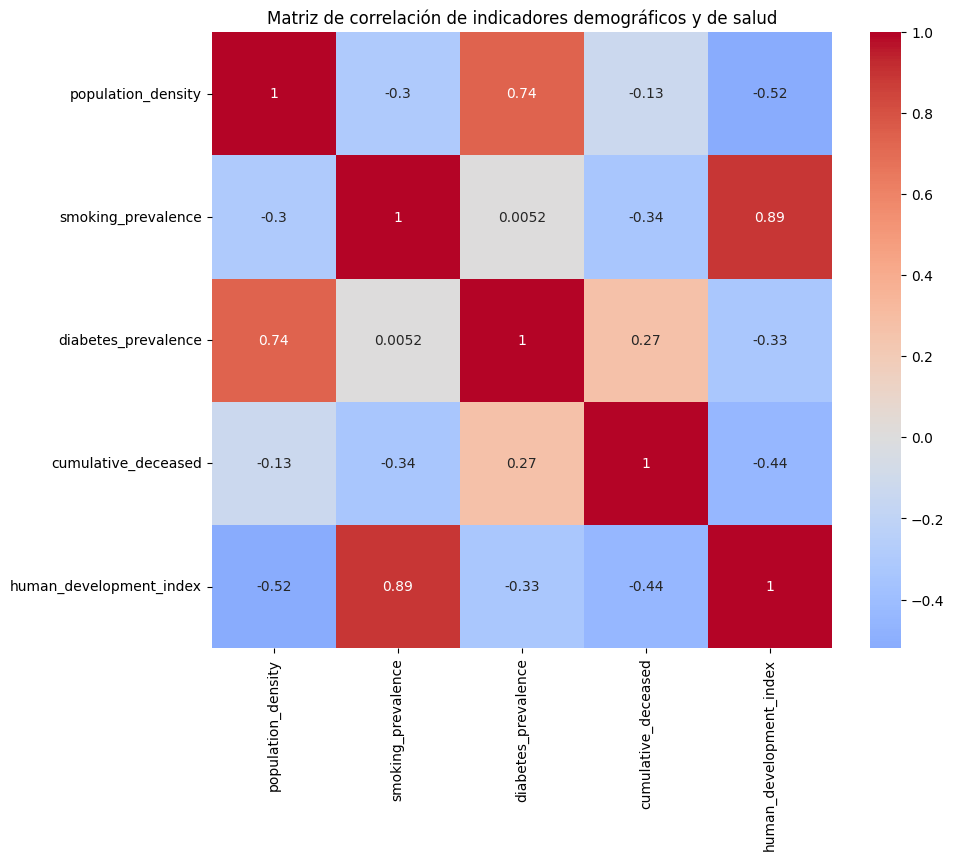

In [48]:
# Selecciono las variables númericas que quiero correlacionar
columns = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
correlation_matrix = data_latinoamerica_paises[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

De esta matriz podemos observar que el fumar y tener diabetes son las enfermedades preexistentes que más afectan a la población en los paises seleccionados, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados, sin embargo esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes.

De acuerdo a esto veamos se comporta la mortalidad en los paises seleccionados por enfermedades preexistentes o comorbilidades.

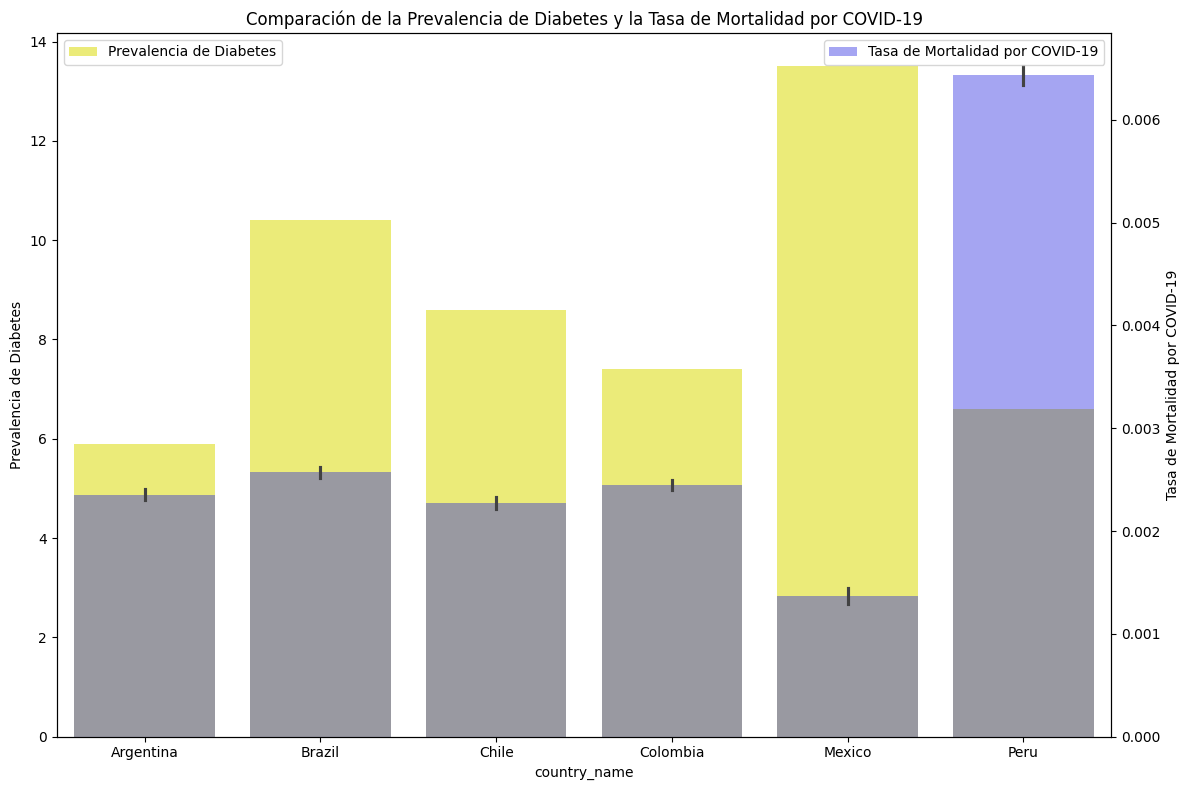

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['diabetes_prevalence'], 
            color='yellow', 
            label='Prevalencia de Diabetes',
            ax=ax,
            alpha=0.6
)

ax2 = ax.twinx()

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'],
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Diabetes')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

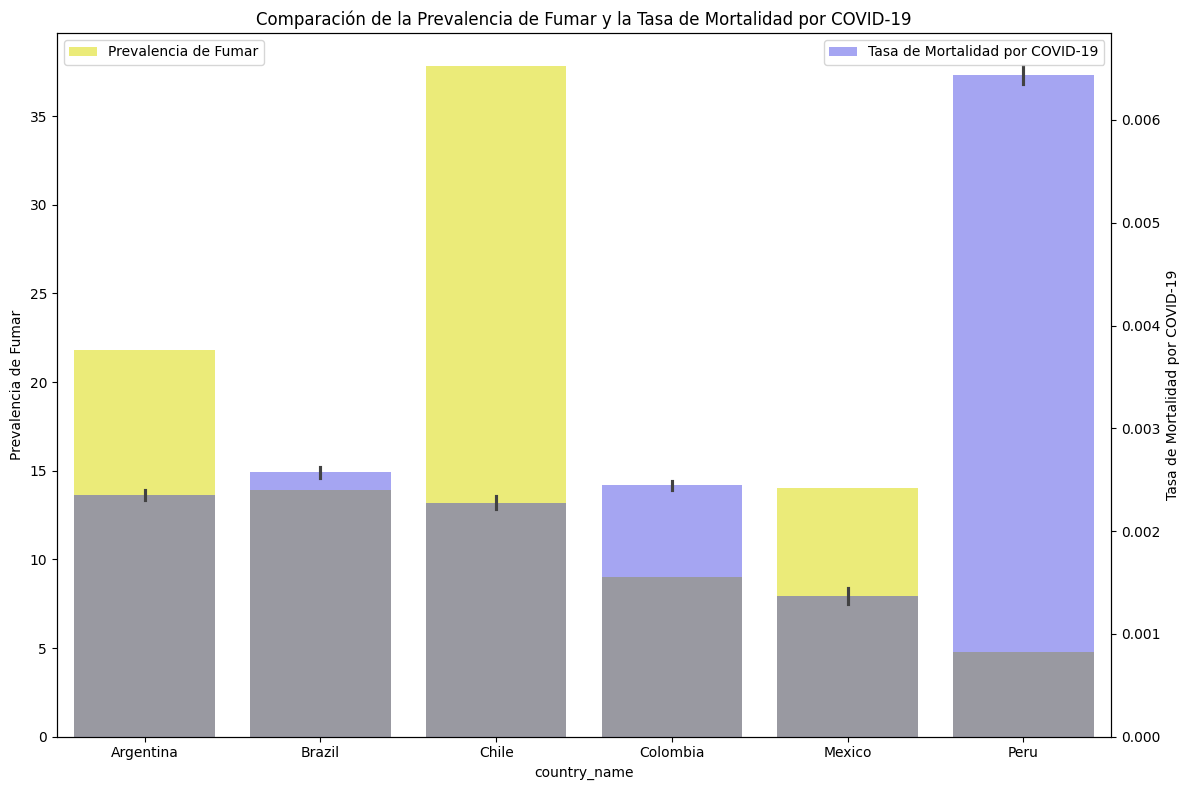

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['smoking_prevalence'], 
            color='yellow', 
            label='Prevalencia de Fumar',
            ax=ax,
            alpha=0.6)

ax2 = ax.twinx()

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'], 
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Fumar')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Comparación de la Prevalencia de Fumar y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

Las dos enfermedades muestran un comportamiento similar en los paises seleccionados, sin embargo se puede observar que la diabetes es la enfermedad que más ha causado muertes en los paises seleccionados, seguido del fumar.

Como conclusión de este avance podemos decir que los paises que más necesitan ayuda son Brasil, México y Colombia, ya que son los paises que más casos confirmados y muertes han tenido, además de ser los paises que menos vacunas han administrado.

Las enfermedades preexistentes que más han afectado a la población en los paises seleccionados son el fumar y la diabetes, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados (Aclarar que esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes y de las que tenemos datos).

## AVANCE 3

In [ ]:
# Crea una nueva columna en el DataFrame data_latinoamerica_paises llamada WEEK, que indica el número de la semana
data_latinoamerica_paises['week'] = data_latinoamerica_paises.index.isocalendar().week
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru        1150.00   
2022-09-14           PE           PE         Peru        5032.18   
2022-09-15           PE           PE         Peru        5032.18   
2022-09-16           PE           PE         Peru        5032.18   
2022-09-17           PE           PE         Peru        5032.18   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   
...                  ...                   ...                  ...   
2022-09-13         22.00            4127612.00            216173.00   
2022-09-14        197.23            4127612.00            216173.00   
2022-09-15        197.23            4127612.00            216173.00   
2022-09-16        197.23            4127612.00            216173.00   
2022-09-17        197.23            4127612.00            216173.00   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   
...                                           ...         ...   
2022-09-13                            83624934.00 29381884.00   
2022-09-14                            83624934.00 29381884.00   
2022-09-15                            83624934.00 29381884.00   
2022-09-16                            83624934.00 29381884.00   
2022-09-17                            83624934.00 29381884.00   

            population_male  ...  population_age_00_19  population_age_20_39  \
date                         ...                                               
2021-01-02      19523766.00  ...           13764384.00           12207806.00   
2021-01-03      19523766.00  ...           13764384.00           12207806.00   
2021-01-04      19523766.00  ...           13764384.00           12207806.00   
2021-01-05      19523766.00  ...           13764384.00           12207806.00   
2021-01-06      19523766.00  ...           13764384.00           12207806.00   
...                     ...  ...                   ...                   ...   
2022-09-13      14450757.00  ...           10176529.00            9274833.00   
2022-09-14      14450757.00  ...           10176529.00            9274833.00   
2022-09-15      14450757.00  ...           10176529.00            9274833.00   
2022-09-16      14450757.00  ...           10176529.00            9274833.00   
2022-09-17      14450757.00  ...           10176529.00            9274833.00   

            population_age_40_59  population_age_60_79  \
date                                                     
2021-01-02            8419068.00            4731808.00   
2021-01-03            8419068.00            4731808.00   
2021-01-04            8419068.00            4731808.00   
2021-01-05            841

Como primera aproximación vamos a realizar un análisis del comportamiento de manera semanal y anual, para esto vamos a agrupar los datos por semana y por año. Para que
recordemos como usar groupby.

In [52]:
# Crea un nuevo DataFrame, data_latinoamerica_paises_2021, que contiene únicamente los registros del año 2021
data_latinoamerica_paises_2021 = data_latinoamerica_paises.loc[
    (data_latinoamerica_paises.index >= '2021-01-01') &
    (data_latinoamerica_paises.index <= '2021-12-31')
]
data_latinoamerica_paises_2021

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   
...                 ...          ...          ...            ...   
2021-12-27           PE           PE         Peru        3261.00   
2021-12-28           PE           PE         Peru        4270.00   
2021-12-29           PE           PE         Peru        4340.00   
2021-12-30           PE           PE         Peru        5220.00   
2021-12-31           PE           PE         Peru        4290.00   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   
...                  ...                   ...                  ...   
2021-12-27         29.00            2285854.00            202515.00   
2021-12-28         37.00            2290124.00            202552.00   
2021-12-29         40.00            2294464.00            202592.00   
2021-12-30         45.00            2299684.00            202637.00   
2021-12-31         37.00            2303974.00            202674.00   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   
...                                           ...         ...   
2021-12-27                            50186253.00 29381884.00   
2021-12-28                            50515554.00 29381884.00   
2021-12-29                            50800766.00 29381884.00   
2021-12-30                            51020490.00 29381884.00   
2021-12-31                            51092425.00 29381884.00   

            population_male  ...  population_age_00_19  population_age_20_39  \
date                         ...                                               
2021-01-02      19523766.00  ...           13764384.00           12207806.00   
2021-01-03      19523766.00  ...           13764384.00           12207806.00   
2021-01-04      19523766.00  ...           13764384.00           12207806.00   
2021-01-05      19523766.00  ...           13764384.00           12207806.00   
2021-01-06      19523766.00  ...           13764384.00           12207806.00   
...                     ...  ...                   ...                   ...   
2021-12-27      14450757.00  ...           10176529.00            9274833.00   
2021-12-28      14450757.00  ...           10176529.00            9274833.00   
2021-12-29      14450757.00  ...           10176529.00            9274833.00   
2021-12-30      14450757.00  ...           10176529.00            9274833.00   
2021-12-31      14450757.00  ...           10176529.00            9274833.00   

            population_age_40_59  population_age_60_79  \
date                                                     
2021-01-02            8419068.00            4731808.00   
2021-01-03            8419068.00            4731808.00   
2021-01-04            8419068.00            4731808.00   
2021-01-05            841

In [53]:
# Agrupa los datos del año 2021 por país y por semana para calcular el total de nuevos casos confirmados (new_confirmed) y nuevas muertes (new_deceased) cada semana en cada país.
weekly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed', 'new_deceased']].sum().reset_index()
weekly_cases

country_name  week  new_confirmed  new_deceased
0      Argentina     1       85321.00       1093.00
1      Argentina     2       76129.00       1191.00
2      Argentina     3       66250.00       1321.00
3      Argentina     4       58524.00       1199.00
4      Argentina     5       50576.00       1112.00
..           ...   ...            ...           ...
313         Peru    49       10004.00        272.00
314         Peru    50       10637.00        265.00
315         Peru    51       11306.00        257.00
316         Peru    52       21381.00        188.00
317         Peru    53        3355.00        374.00

[318 rows x 4 columns]

In [54]:
weekly_cases['country_name'].unique()

array(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'],
      dtype=object)

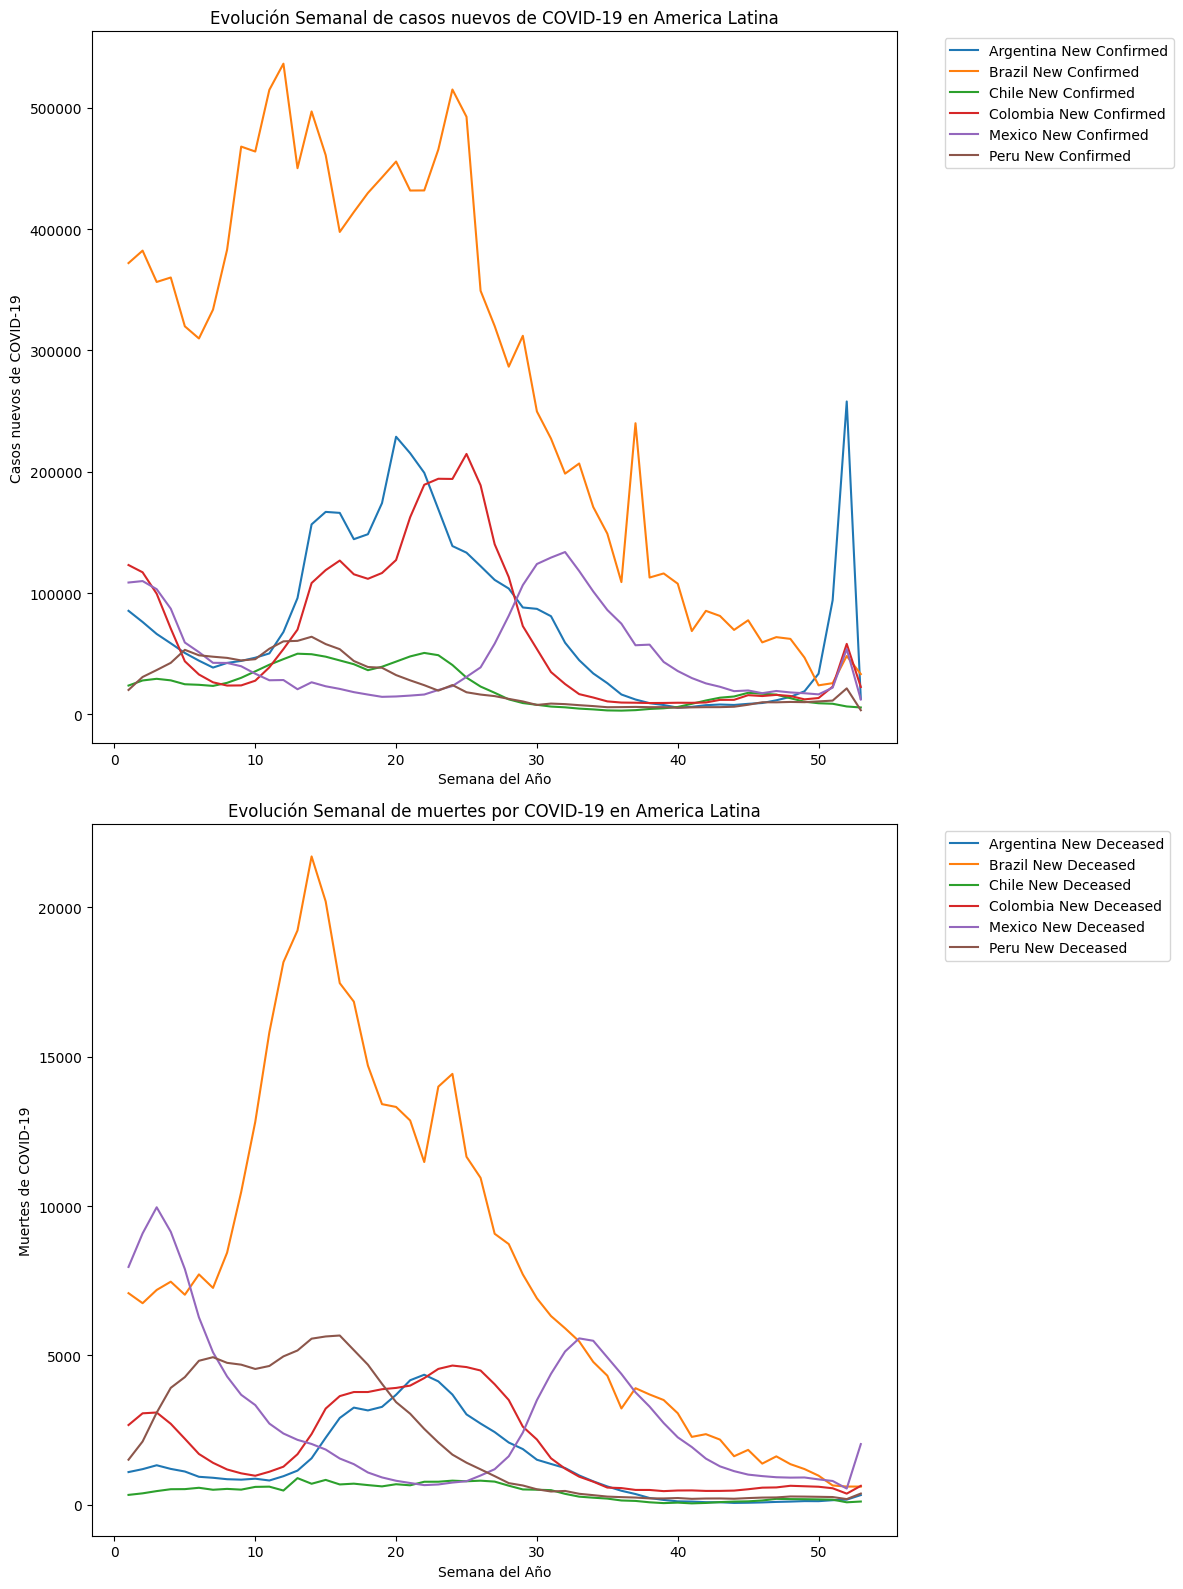

In [ ]:
# Genera gráficos de líneas para visualizar la evolución semanal de los casos nuevos de COVID-19 y las muertes por COVID-19 en los países de América Latina durante el año 2021.
weekly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed', 'new_deceased']].sum().reset_index()
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name']==country]
    ax[0].plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=f'{country} New Confirmed')
    ax[1].plot(country_weekly_cases['week'], country_weekly_cases['new_deceased'], label=f'{country} New Deceased')

ax[0].set_xlabel('Semana del Año')
ax[0].set_ylabel('Casos nuevos de COVID-19')
ax[0].set_title('Evolución Semanal de casos nuevos de COVID-19 en America Latina')
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel('Semana del Año')
ax[1].set_ylabel('Muertes de COVID-19')
ax[1].set_title('Evolución Semanal de muertes por COVID-19 en America Latina')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

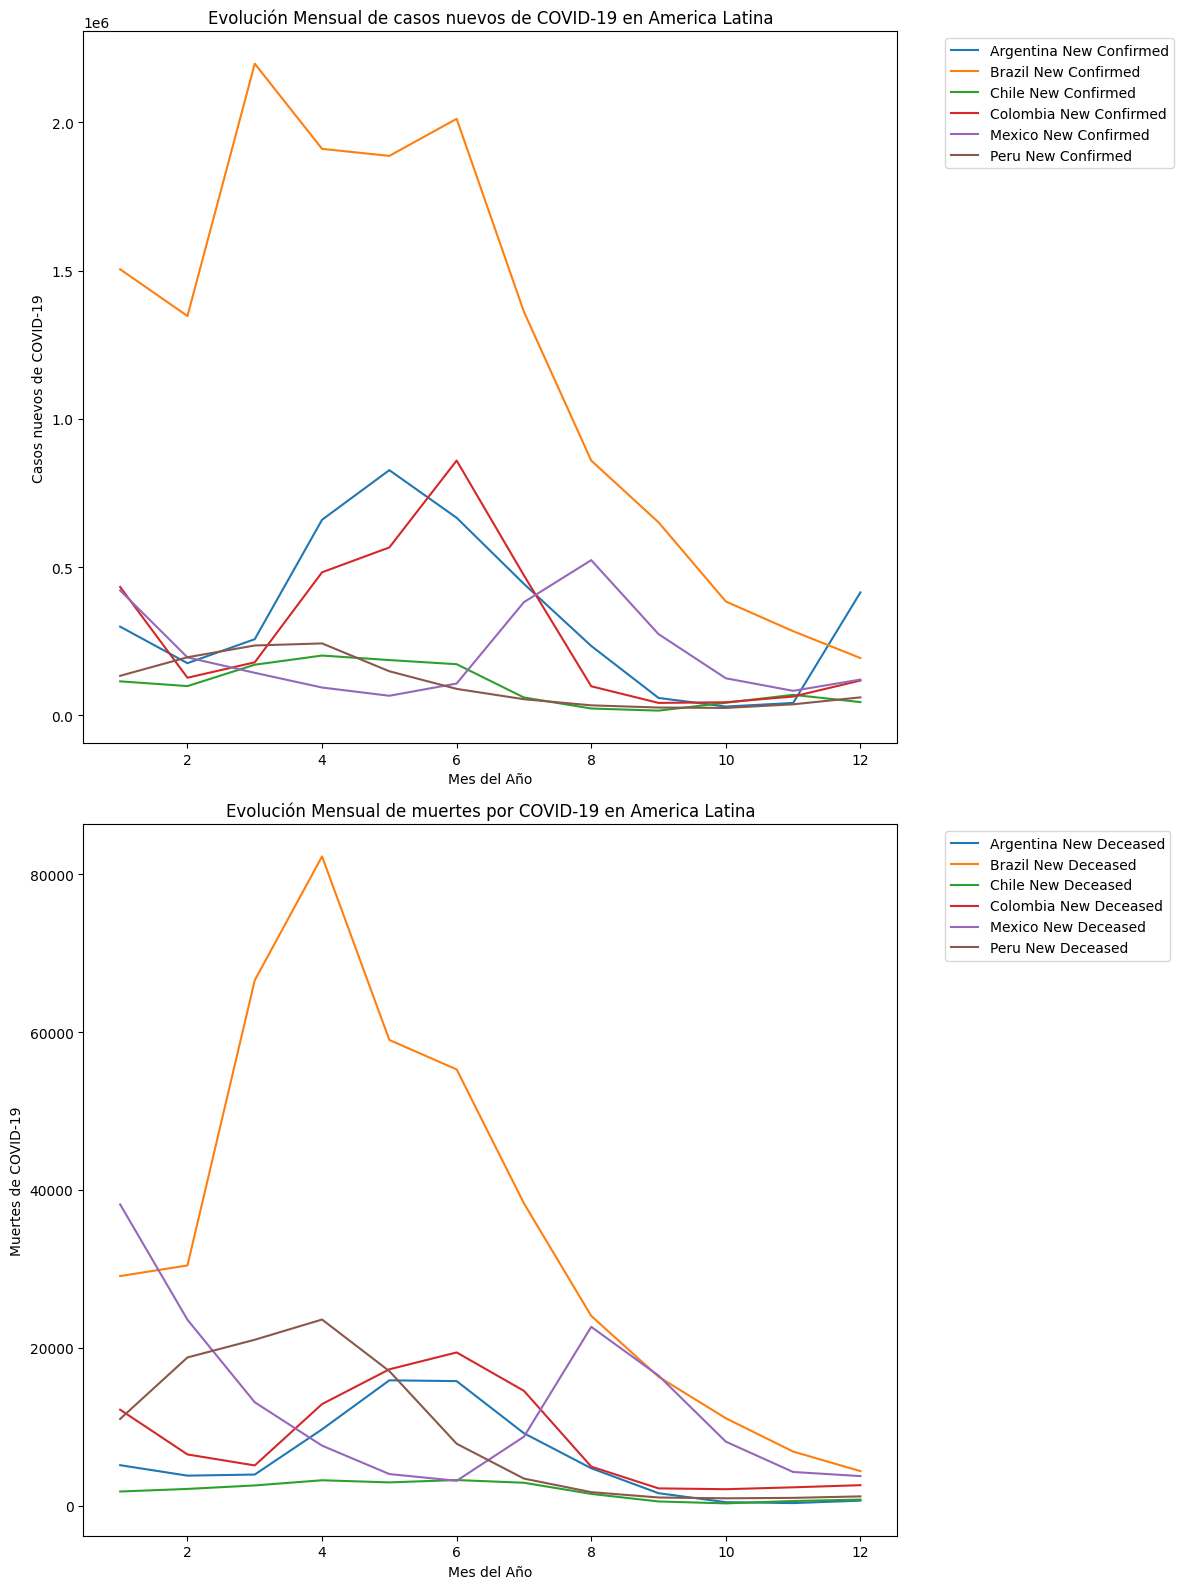

In [56]:
# Crea gráficos de líneas que muestran la evolución mensual de los casos nuevos de COVID-19 y las muertes en América Latina durante el año 2021
data_latinoamerica_paises_2021['month'] = data_latinoamerica_paises_2021.index.month
yearly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'month'])[['new_confirmed', 'new_deceased']].sum().reset_index()

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name']==country]
    ax[0].plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label=f'{country} New Confirmed')
    ax[1].plot(country_yearly_cases['month'], country_yearly_cases['new_deceased'], label=f'{country} New Deceased')

ax[0].set_xlabel('Mes del Año')
ax[0].set_ylabel('Casos nuevos de COVID-19')
ax[0].set_title('Evolución Mensual de casos nuevos de COVID-19 en America Latina')
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel('Mes del Año')
ax[1].set_ylabel('Muertes de COVID-19')
ax[1].set_title('Evolución Mensual de muertes por COVID-19 en America Latina')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

De la anterior gráfica se puede observar que la cantidad de casos confirmados y muertes ha ido disminuyendo a 10 largo del tiempo, sin embargo esto no quiere decir que la
pandemia haya terminado, ya que la cantidad de casos confirmados y muertes sigue siendo alta, ademas se nota un pico en la fechas finales.

4. Genera gráficas acordes a tu análisis. Las mismas pueden ser:

<ul>
    <li>Evolución de Casos Activos vs. Recuperados</li>
    <li>Tasa de Crecimiento (%)</li>
    <li>Relación entre la Cobertura de Vacunación y la Reducción de Casos</li>
    <li>('País') Progreso de la vacunación por país</li>
    <li>Nuevos casos y temperatura promedio</li>
    <li>Impacto de la Urbanización en la Propagación del Covid-19</li>
    <li>Evolución Semanal de Casos Nuevos</li>
    <li>Evolución Anual de Casos Nuevos</li>
    <li>Distribución de la Población por Edad en Países</li>
    <li>Comparación de Estrategias de Vacunación en América Latina</li>
    <li>Evolución del Número de Muertes Diarias</li>
    <li>Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad</li>
    <li>Variación Mensual de Casos y Muertes</li>
    <li>Análisis Temporal de la Mortalidad</li>
    <li>Comparación de la Situación Actual (Contexto de los datos)</li>
</ul>



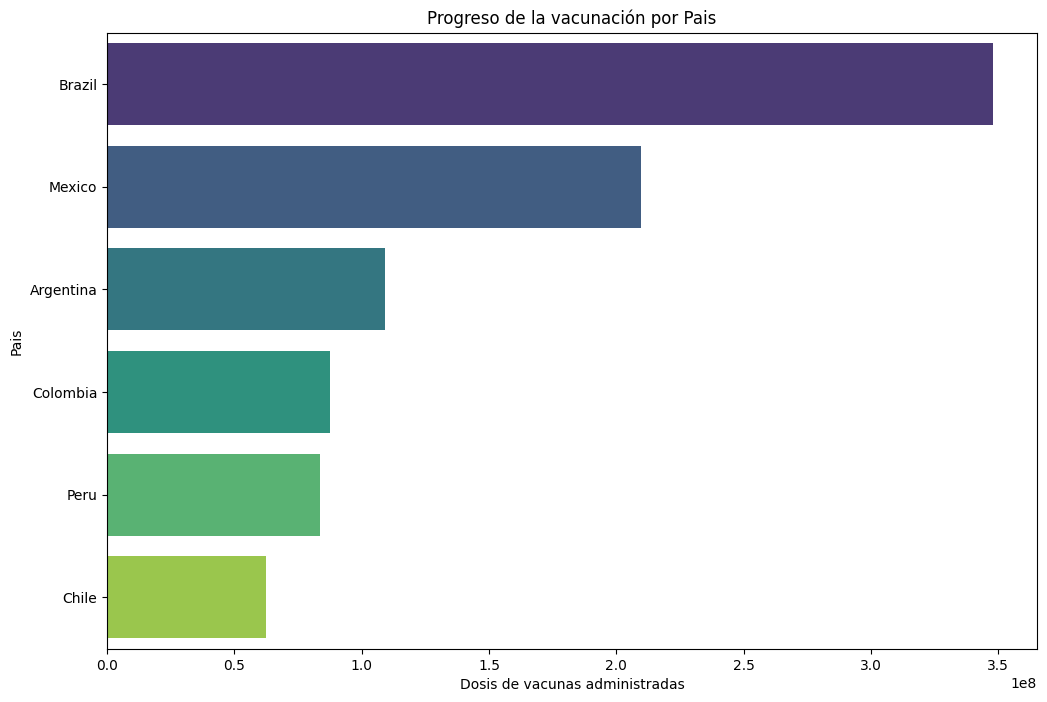

In [ ]:
# Comparación de Estrategias de Vacunación en América Latina (muestra el progreso de la vacunación en cada país, utilizando el valor máximo de las dosis acumuladas de vacunas administradas)
vaccination_data = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, hue= vaccination_data.index, palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('Pais')
plt.title('Progreso de la vacunación por Pais')
plt.show()

El país con mayor dosis administradas es Brasil, seguido de México, Argentina, Colombia, Peru y Chile. Se contradice con los hallazgos anteriores sin embargo recordemos que se
debe tener en cuenta la población de cada país y la cantidad de vacunas disponibles.
y la temperatura cómo se comporta en los paises seleccionados?

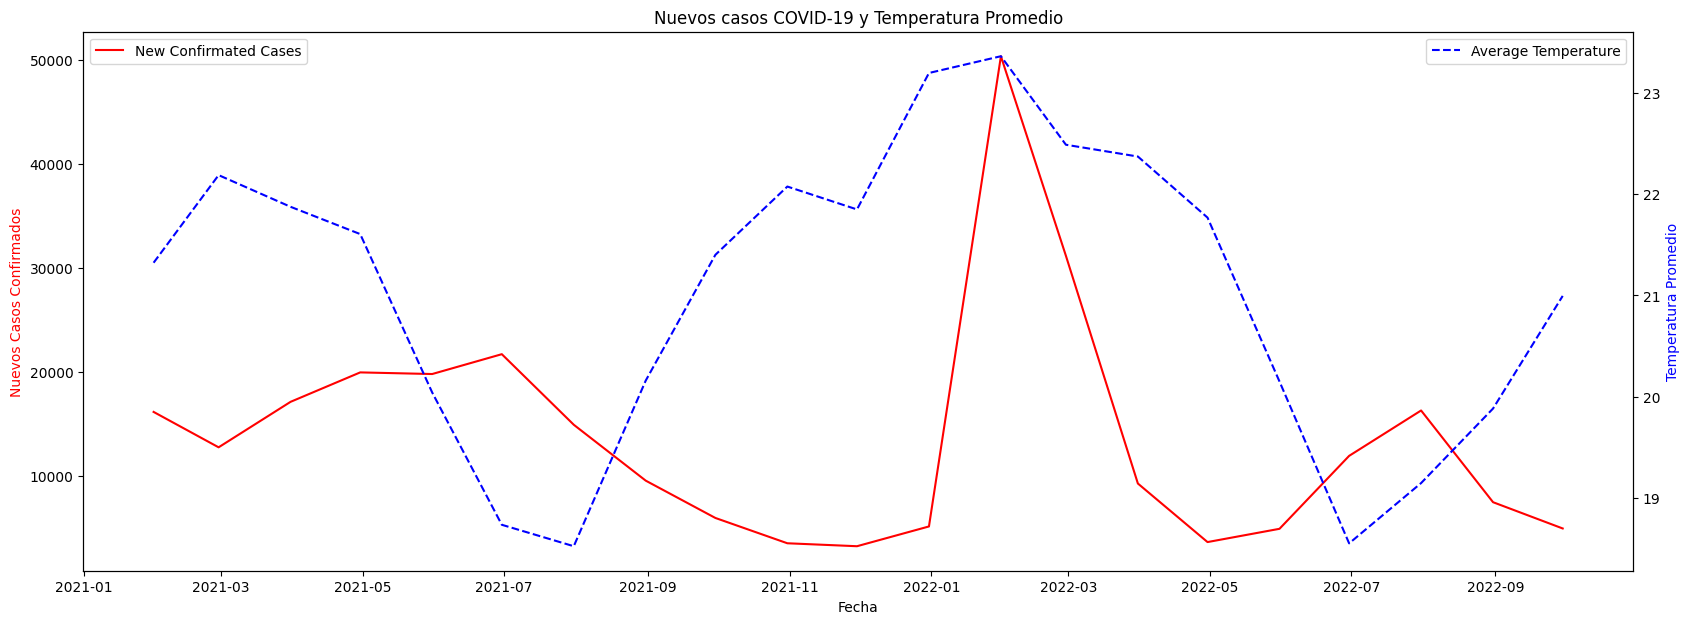

In [58]:
# - Nuevos casos y temperatura promedio
# Graficamos la relación entre la temperatura promedio y los nuevos casos confirmados de COVID-19

plt.figure(figsize=(20,7))
ax1 = plt.gca() #obtiene el eje actual de la grafica
ax2 = ax1.twinx() #crea un segundo eje  ax2 que comparte el mismo eje x que ax1, permitiendo graficas 2 conjuntos de datos con diferentes escalas y unidades
ax1.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'], color='red', label='New Confirmated Cases')
ax2.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='blue', label='Average Temperature', linestyle='--')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos Casos Confirmados', color='red')
ax2.set_ylabel('Temperatura Promedio', color='blue')
plt.title('Nuevos casos COVID-19 y Temperatura Promedio')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [59]:
data_latinoamerica_paises[['population', 'population_urban', 'cumulative_confirmed']]

population  population_urban  cumulative_confirmed
date                                                          
2021-01-02 44938712.00       41339571.00            1670634.00
2021-01-03 44938712.00       41339571.00            1675568.00
2021-01-04 44938712.00       41339571.00            1689521.00
2021-01-05 44938712.00       41339571.00            1703606.00
2021-01-06 44938712.00       41339571.00            1718102.00
...                ...               ...                   ...
2022-09-13 29381884.00       25390339.00            4127612.00
2022-09-14 29381884.00       25390339.00            4127612.00
2022-09-15 29381884.00       25390339.00            4127612.00
2022-09-16 29381884.00       25390339.00            4127612.00
2022-09-17 29381884.00       25390339.00            4127612.00

[3744 rows x 3 columns]

Este análisis muestra que los países con mayores porcentajes de población urbana, como Chile y México, tienen diferentes niveles de propagación del COVID-19, lo cual sugiere que la urbanización puede ser un factor relevante en la propagación

In [60]:
# -Impacto de la Urbanización en la Propagación del Covid-19
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
data_latinoamerica_paises['confirmed_population_percentage'] = data_latinoamerica_paises['cumulative_confirmed'] / data_latinoamerica_paises['population']
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')
urban_cases

location_key country_code  new_confirmed  new_deceased  \
country_name                                                          
Colombia               CO           CO        7407.41        185.10   
Brazil                 BR           BR       43196.55        787.45   
Peru                   PE           PE        5032.18        197.23   
Argentina              AR           AR       12911.39        134.38   
Mexico                 MX           MX        8874.67        285.94   
Chile                  CL           CL        6109.25         71.23   

              cumulative_confirmed  cumulative_deceased  \
country_name                                              
Colombia                6304317.00            141708.00   
Brazil                 34568833.00            685203.00   
Peru                    4127612.00            216173.00   
Argentina               9697763.00            129830.00   
Mexico                  2978564.00             23985.00   
Chile                   4568495.00             60822.00   

              cumulative_vaccine_doses_administered   population  \
country_name                                                       
Colombia                                87566541.00  50882884.00   
Brazil                                 347868481.00 212559409.00   
Peru                                    83624934.00  29381884.00   
Argentina                              109204825.00  44938712.00   
Mexico                                 209673612.00 110991953.00   
Chile                                   62204235.00  17574003.00   

              population_male  population_female  ...  population_age_40_59  \
country_name                                      ...                         
Colombia          24984564.00        25898320.00  ...           11994767.00   
Brazil           104435783.00       108123626.00  ...           53883208.00   
Peru              14450757.00        14931127.00  ...            6432946.00   
Argentina         19523766.00        20593330.00  ...            8419068.00   
Mexico            54855231.00        57481307.00  ...           21897612.00   
Chile              8972014.00         8601989.00  ...            4930675.00   

              population_age_60_79  population_age_00_19_vacunados  \
country_name                                                         
Colombia                5751119.00                        26733181   
Brazil                 25698413.00                        98582686   
Peru                    2924473.00                        28963818   
Argentina               4731808.00                        33448603   
Mexico                  8553148.00                        82254513   
Chile                   2784913.00                        17421564   

              population_age_20_39_vacunados  population_age_40_59_vacunados  \
country_name                                                                   
Colombia                            28666366                        20642309   
Brazil                             112238311                        88183674   
Peru                                26397466                        18309060   
Argentina                           29665988                        20459038   
Mexico                              66957289                        41366525   
Chile                               21028319                        17452419   

              population_age_60_79_vacunados  \
country_name                                   
Colombia                             9897347   
Brazil                              42057267   
Peru                                 8323457   
Argentina                           11498688   
Mexico                              16157652   
Chile                                9857366   

              population_age_80_and_older_vacunados  week  \
country_name                                                
Colombia                                    1627335    37   
Brazil                 

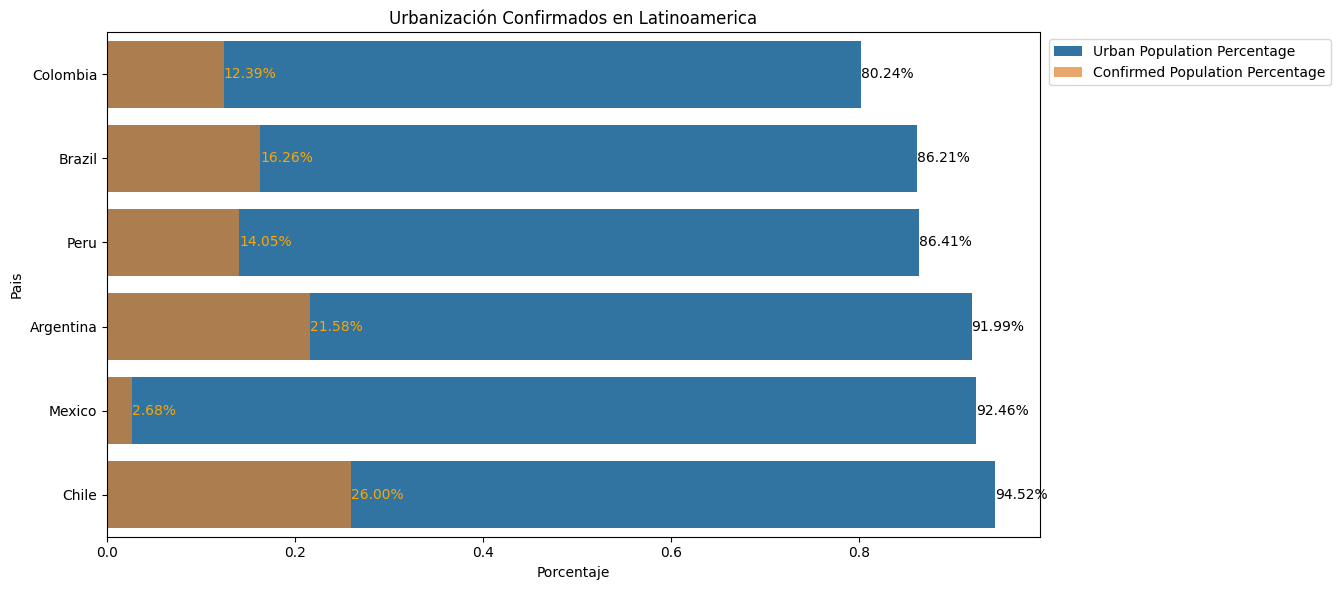

In [61]:
# Impacto de la Urbanización en la Propagación del Covid-19: Urbanización en Latinoamerica
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
data_latinoamerica_paises['confirmed_population_percentage'] = data_latinoamerica_paises['cumulative_confirmed'] / data_latinoamerica_paises['population']
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(14, 6))
ax = sns.barplot(x='urban_population_percentage', y=urban_cases.index, data=urban_cases, label='Urban Population Percentage')

#Añadir etiquetas a cada barra para urban_population_percentage
for index, value in enumerate(urban_cases['urban_population_percentage']):
    ax.text(value, index, f'{value*100:.2f}%', color='black', ha='left', va='center')

#Superponer la segunda barra para confirmed_population_percentage
ax2 = sns.barplot(x='confirmed_population_percentage', y=urban_cases.index, data=urban_cases, alpha=0.7, label='Confirmed Population Percentage')

#Añadir etiquetas a cada barra para confirmed_population_percentage
for index, value in enumerate(urban_cases['confirmed_population_percentage']):
    ax2.text(value, index, f'{value*100:.2f}%', color='orange', ha='left', va='center')

plt.xlabel('Porcentaje')
plt.ylabel('Pais')
plt.title('Urbanización Confirmados en Latinoamerica')
plt.legend(bbox_to_anchor=(1.32, 1), loc='upper right')
plt.tight_layout()
plt.show()

EI pais con mayor impacto en la propagación fue chile, aunque es extraño ya que chile fue uno de los paises que mejor manejó la pandemia, sin embargo esto puede ser debido a la
densidad de población en chile.

Y la densidad de población por grupos de edad?

In [62]:
# Se agrega columna deceased_percentage  data_latinoamerica_paises. Esta columna muestra el porcentaje de la población total que ha fallecido debido al COVID-19
data_latinoamerica_paises['deceased_percentage'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population']
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru        1150.00   
2022-09-14           PE           PE         Peru        5032.18   
2022-09-15           PE           PE         Peru        5032.18   
2022-09-16           PE           PE         Peru        5032.18   
2022-09-17           PE           PE         Peru        5032.18   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   
...                  ...                   ...                  ...   
2022-09-13         22.00            4127612.00            216173.00   
2022-09-14        197.23            4127612.00            216173.00   
2022-09-15        197.23            4127612.00            216173.00   
2022-09-16        197.23            4127612.00            216173.00   
2022-09-17        197.23            4127612.00            216173.00   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   
...                                           ...         ...   
2022-09-13                            83624934.00 29381884.00   
2022-09-14                            83624934.00 29381884.00   
2022-09-15                            83624934.00 29381884.00   
2022-09-16                            83624934.00 29381884.00   
2022-09-17                            83624934.00 29381884.00   

            population_male  ...  population_age_60_79  \
date                         ...                         
2021-01-02      19523766.00  ...            4731808.00   
2021-01-03      19523766.00  ...            4731808.00   
2021-01-04      19523766.00  ...            4731808.00   
2021-01-05      19523766.00  ...            4731808.00   
2021-01-06      19523766.00  ...            4731808.00   
...                     ...  ...                   ...   
2022-09-13      14450757.00  ...            2924473.00   
2022-09-14      14450757.00  ...            2924473.00   
2022-09-15      14450757.00  ...            2924473.00   
2022-09-16      14450757.00  ...            2924473.00   
2022-09-17      14450757.00  ...            2924473.00   

            population_age_00_19_vacunados  population_age_20_39_vacunados  \
date                                                                         
2021-01-02                            6228                            5523   
2021-01-03                            6287                            5576   
2021-01-04                            7707                            6835   
2021-01-05                            9143                            8109   
2021-01-06                           10463                            9280   
...                                    ...             

In [63]:
# Estos países presentan los valores más altos de deceased_percentage, lo cual indica un impacto significativo del COVID-19 en términos de fallecimientos relativos a su población total
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(5).index
high_mortality_countries

Index(['Peru', 'Chile', 'Brazil', 'Colombia', 'Argentina'], dtype='object', name='country_name')

In [64]:
data_latinoamerica_paises.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [ ]:
# Seleccionamos las columnas de grupos de edad del DataFrame
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29','population_age_30_39', 'population_age_40_49', 'population_age_50_59','population_age_60_69', 'population_age_70_79','population_age_80_and_older']
data_latinoamerica_paises[age_groups]

population_age_00_09  population_age_10_19  population_age_20_29  \
date                                                                           
2021-01-02            6718871.00            7045513.00            6430658.00   
2021-01-03            6718871.00            7045513.00            6430658.00   
2021-01-04            6718871.00            7045513.00            6430658.00   
2021-01-05            6718871.00            7045513.00            6430658.00   
2021-01-06            6718871.00            7045513.00            6430658.00   
...                          ...                   ...                   ...   
2022-09-13            5140624.00            5035905.00            4895056.00   
2022-09-14            5140624.00            5035905.00            4895056.00   
2022-09-15            5140624.00            5035905.00            4895056.00   
2022-09-16            5140624.00            5035905.00            4895056.00   
2022-09-17            5140624.00            5035905.00            4895056.00   

            population_age_30_39  population_age_40_49  population_age_50_59  \
date                                                                           
2021-01-02            5777148.00            4507125.00            3911943.00   
2021-01-03            5777148.00            4507125.00            3911943.00   
2021-01-04            5777148.00            4507125.00            3911943.00   
2021-01-05            5777148.00            4507125.00            3911943.00   
2021-01-06            5777148.00            4507125.00            3911943.00   
...                          ...                   ...                   ...   
2022-09-13            4379777.00            3660378.00            2772568.00   
2022-09-14            4379777.00            3660378.00            2772568.00   
2022-09-15            4379777.00            3660378.00            2772568.00   
2022-09-16            4379777.00            3660378.00            2772568.00   
2022-09-17            4379777.00            3660378.00            2772568.00   

            population_age_60_69  population_age_70_79  \
date                                                     
2021-01-02            2914251.00            1817557.00   
2021-01-03            2914251.00            1817557.00   
2021-01-04            2914251.00            1817557.00   
2021-01-05            2914251.00            1817557.00   
2021-01-06            2914251.00            1817557.00   
...                          ...                   ...   
2022-09-13            1846407.00            1078066.00   
2022-09-14            1846407.00            1078066.00   
2022-09-15            1846407.00            1078066.00   
2022-09-16            1846407.00            1078066.00   
2022-09-17            1846407.00            1078066.00   

            population_age_80_and_older  
date                                     
2021-01-02                    994030.00  
2021-01-03                    994030.00  
2021-01-04                    994030.00  
2021-01-05                    994030.00  
2021-01-06                    994030.00  
...                                 ...  
2022-09-13                    573103.00  
2022-09-14                    573103.00  
2022-09-15                    573103.00  
2022-09-16                    573103.00  
2022-09-17                    573103.00  

[3744 rows x 9 columns]

In [ ]:
# Se hace la distribución promedio de la población por grupos de edad para los cinco países de América Latina con las tasas de mortalidad más altas debido al COVID-19:
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
age_distribution

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina               6718871.00            7045513.00   
Brazil                 29076910.00           31160446.00   
Chile                   2428079.00            2493879.00   
Colombia                7414155.00            8119876.00   
Peru                    5140624.00            5035905.00   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina               6430658.00            5777148.00   
Brazil                 34104643.00           34476762.00   
Chile                   2995538.00            2945404.00   
Colombia                8847061.00            7810299.00   
Peru                    4895056.00            4379777.00   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina               4507125.00            3911943.00   
Brazil                 29462006.00           24421202.00   
Chile                   2578404.00            2352271.00   
Colombia                6450787.00            5543980.00   
Peru                    3660378.00            2772568.00   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina               2914251.00            1817557.00   
Brazil                 16896862.00            8801551.00   
Chile                   1791787.00             993126.00   
Colombia                3771358.00            1979761.00   
Peru                    1846407.00            1078066.00   

              population_age_80_and_older  
country_name                               
Argentina                       994030.00  
Brazil                         4159027.00  
Chile                           537721.00  
Colombia                        945607.00  
Peru                            573103.00

In [69]:
# Filtra el DataFrame age_distribution para obtener únicamente la fila donde el índice (index) es igual a 'Argentina'
age_distribution_arg = age_distribution[age_distribution.index == 'Argentina']
age_distribution_arg

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina               6718871.00            7045513.00   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina               6430658.00            5777148.00   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina               4507125.00            3911943.00   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina               2914251.00            1817557.00   

              population_age_80_and_older  
country_name                               
Argentina                       994030.00

In [ ]:
# Muestra los valores únicos en el índice de age_distribution
age_distribution.index.unique()

Index(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Peru'], dtype='object', name='country_name')

In [ ]:
# Acceder a los datos de distribución de edad específicos de Argentina utilizando .loc
age_distribution_arg.loc['Argentina']

population_age_00_09          6718871.00
population_age_10_19          7045513.00
population_age_20_29          6430658.00
population_age_30_39          5777148.00
population_age_40_49          4507125.00
population_age_50_59          3911943.00
population_age_60_69          2914251.00
population_age_70_79          1817557.00
population_age_80_and_older    994030.00
Name: Argentina, dtype: float64

In [ ]:
# Accede al índice de la fila correspondiente a 'Argentina' en el DataFrame age_distribution.Index devuelve los nombres de las columnas
age_distribution.loc['Argentina'].index

Index(['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older'],
      dtype='object')

In [ ]:
# Muestra la fila de age_distribution correspondiente a Argentina utilizando .values para obtener solo los valores numéricos, sin los nombres de las columnas.
age_distribution.loc['Argentina'].values

array([6718871., 7045513., 6430658., 5777148., 4507125., 3911943.,
       2914251., 1817557.,  994030.])

In [ ]:
# Comprobamos que age_distribution_arg solo contiene la fila para 'Argentina'
age_distribution_arg.index

Index(['Argentina'], dtype='object', name='country_name')

In [ ]:
# Muestra las columnas que representan los diferentes grupos de edad dentro de la población de Argentina
age_distribution_arg.columns

Index(['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older'],
      dtype='object')

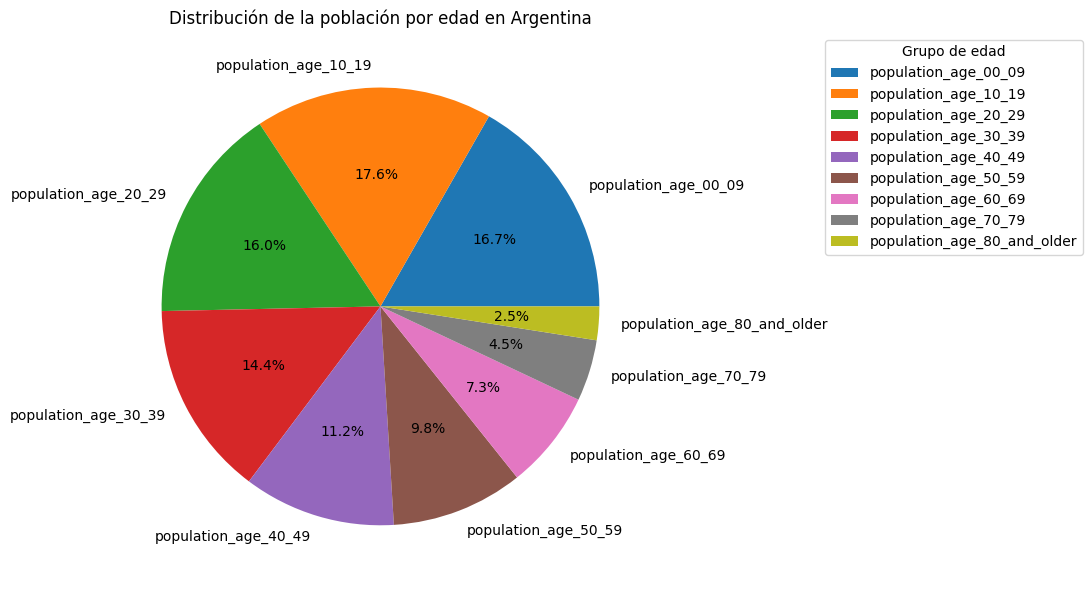

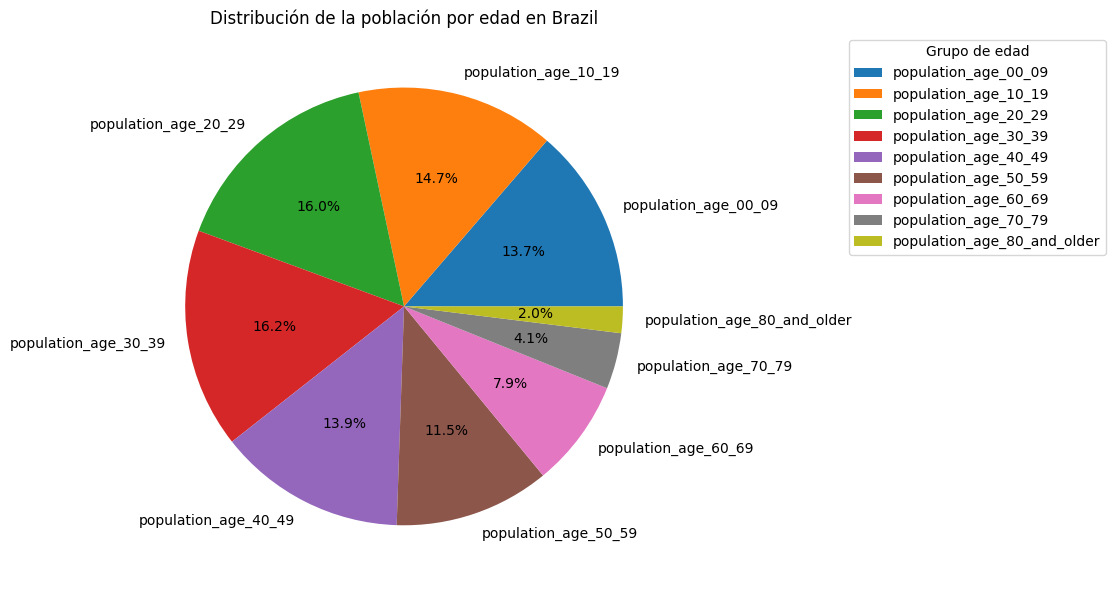

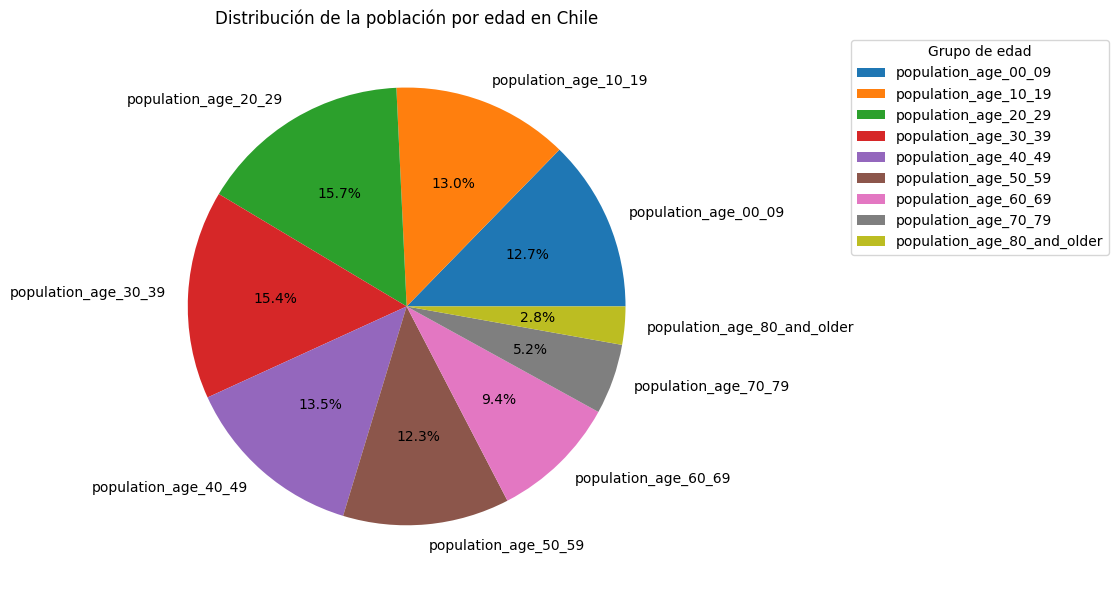

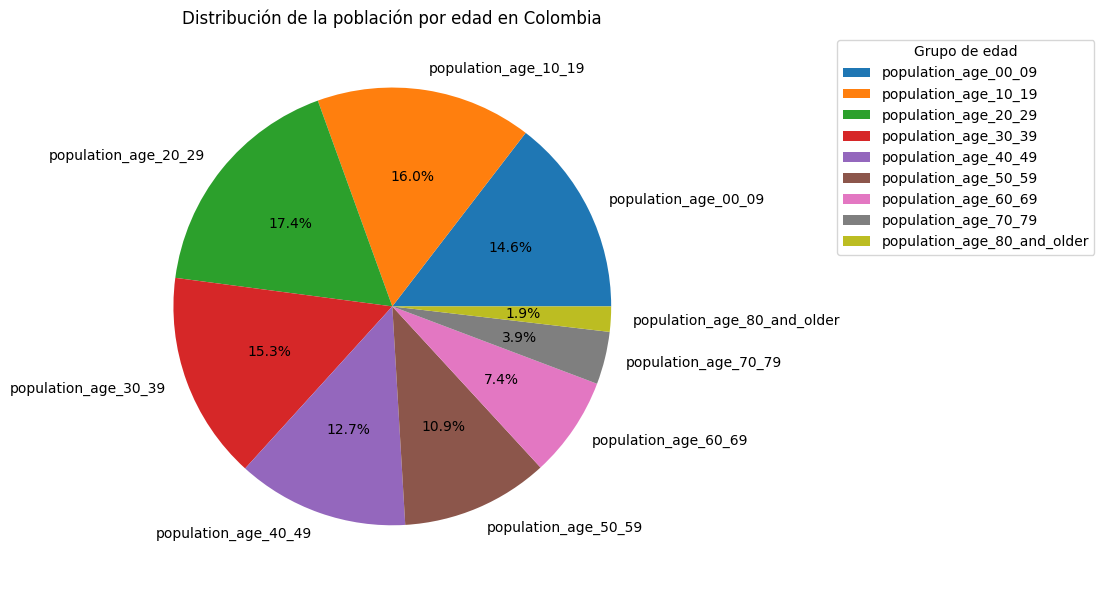

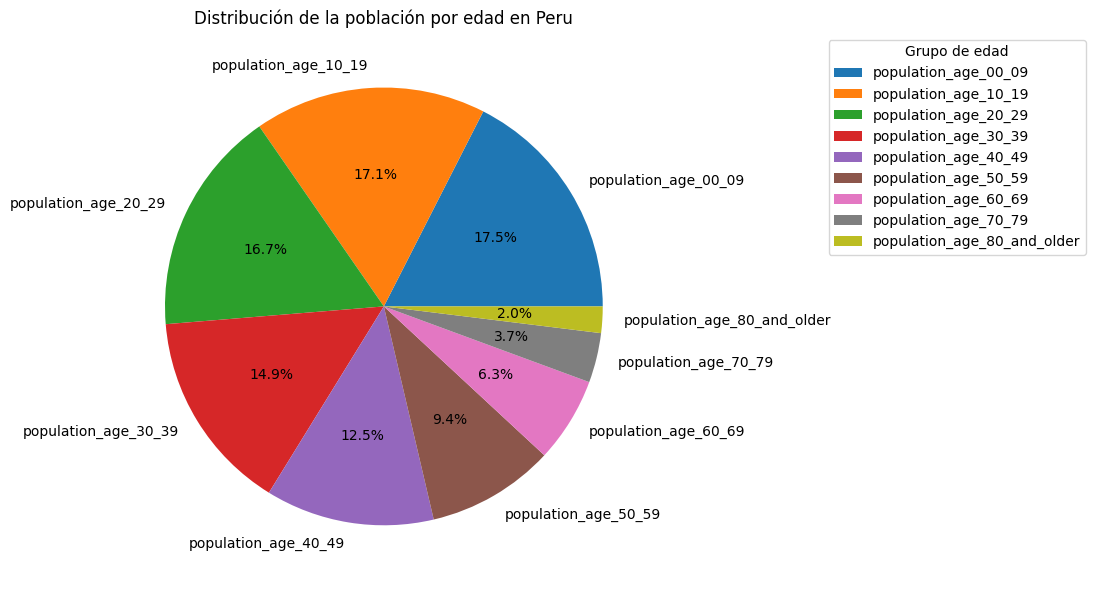

In [ ]:
#Genera gráficos de pastel para visualizar la distribución de la población por grupos de edad en los cinco países con mayor tasa de mortalidad debido al COVID-19
# Densidad de población por grupos de edad en los países con mayor mortalidad
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(5).index
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

# Agrupación por país y grupos de edad
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
paises = age_distribution.index.unique()

# Crear gráficos de pastel para cada país
for pais in paises:
    plt.figure(figsize=(12,6))
    plt.pie(
        age_distribution.loc[pais].values,  # Cambiado de 'pais' a pais
        labels=age_distribution.loc[pais].index,
        autopct='%1.1f%%'
    )

    plt.title(f'Distribución de la población por edad en {pais}')
    plt.legend(bbox_to_anchor=(1.3, 1), loc='upper left', title='Grupo de edad')
    plt.tight_layout()
    plt.show()



EI gráfico muestra claramente la desigualdad en cantidades de población por grupos de edad en los paises seleccionados aunque no proporcione muchas cosas interesantes. Es
bueno tenerlo en cuenta para futuros análisis.
Sin embargo podemos empezar a ver como fueron de buenas o malas las estrategias de vacunación para mitigar la mortalidad y los casos confirmados.

• Comparación de estrategias de vacunación

In [ ]:
# Calucular la maxima dosis aplicados por cada país
data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max()

country_name
Argentina   109204825.00
Brazil      347868481.00
Chile        62204235.00
Colombia     87566541.00
Mexico      209673612.00
Peru         83624934.00
Name: cumulative_vaccine_doses_administered, dtype: float64

In [ ]:
# El promedio de población para cada país en América Latina es el siguiente
data_latinoamerica_paises.groupby('country_name')['population'].mean()

country_name
Argentina    44938712.00
Brazil      212559409.00
Chile        17574003.00
Colombia     50882884.00
Mexico      110991953.00
Peru         29381884.00
Name: population, dtype: float64

In [ ]:
# La relación entre el número máximo de dosis de vacunas administradas acumuladas y el promedio de población para cada país
data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].mean()

country_name
Argentina   2.43
Brazil      1.64
Chile       3.54
Colombia    1.72
Mexico      1.89
Peru        2.85
dtype: float64

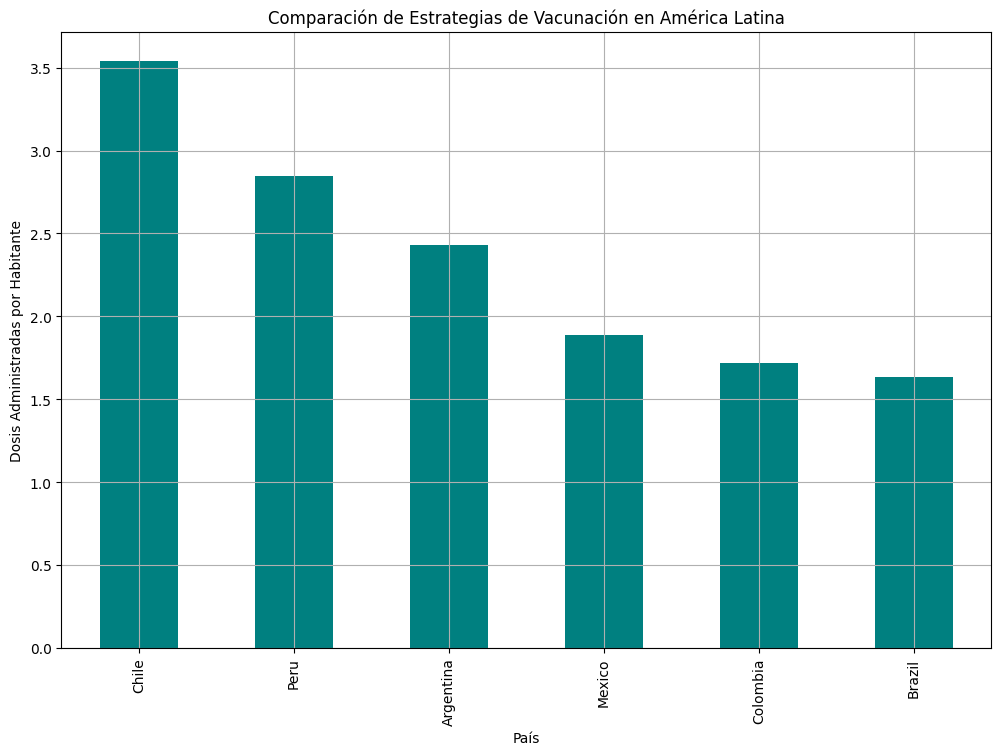

In [79]:
# Genera un gráfico de barras que compara la cantidad de dosis de vacunas administradas por habitante 
vaccination_strategy = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].mean()
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal', grid=True)

plt.xlabel('País')
plt.ylabel('Dosis Administradas por Habitante')
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.show()

Nuevamente vemos el buen resultado de las politicas de chile y un clara falla en Colombia y Brasil.

Con esto vamos definiendo los paises que necesitan más ayuda y donde se deberían crear los nuevos centros.

Anterioremente revisamos las diabeter pero seria bueno revisarlo en porcentajes para identificar paises.

- Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad

In [80]:
data_latinoamerica_paises.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [ ]:
# Los tres países con el porcentaje de mortalidad más alto en América Latina
top_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nlargest(3).index
top_countries

Index(['Peru', 'Chile', 'Brazil'], dtype='object', name='country_name')

In [ ]:
# Los tres países con el porcentaje de mortalidad más bajo en América Latina
bottom_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 5 paises con menor cantidad de muertes
bottom_countries

Index(['Mexico', 'Argentina', 'Colombia'], dtype='object', name='country_name')

In [ ]:
# La lista completa de países en América Latina, ordenada por su porcentaje máximo de mortalidad (de mayor a menor)
all_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False) # 5 paises con menor cantidad de muertes
all_countries

country_name
Peru        0.01
Chile       0.00
Brazil      0.00
Colombia    0.00
Argentina   0.00
Mexico      0.00
Name: deceased_percentage, dtype: float64

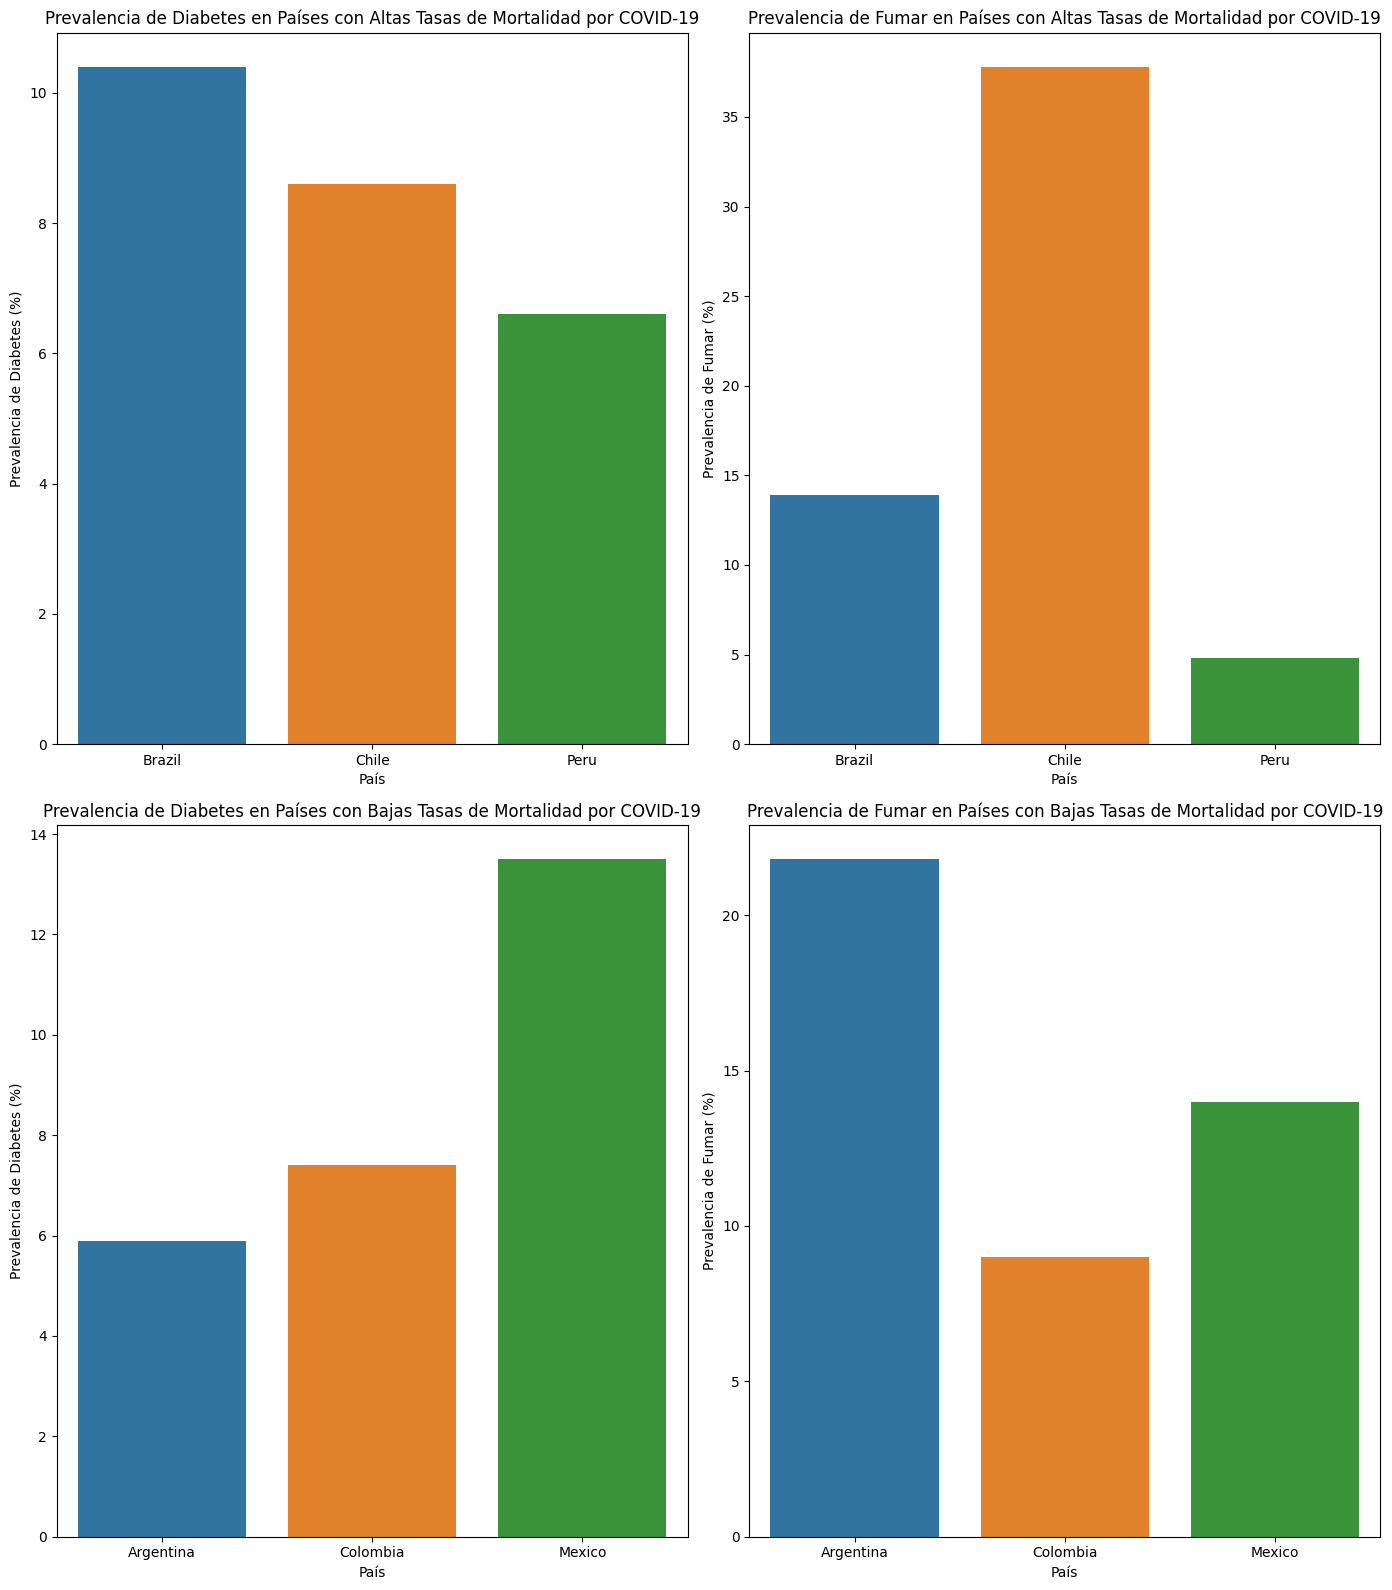

In [84]:
# Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad.

top_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nlargest(3).index # 5 paises con mayor cantidad de muertes
bottom_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 5 paises con menor cantidad de muertes

conditions_top_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(top_countries)]
conditions_bottom_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(bottom_countries)]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    ncols=2,
    nrows=2,
    figsize=(14, 16)
)

# Prevalencia de diabetes en top
sns.barplot(data=conditions_top_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax1)
ax1.set_xlabel('País')
ax1.set_ylabel('Prevalencia de Diabetes (%)')
ax1.set_title('Prevalencia de Diabetes en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_top_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax2)
ax2.set_xlabel('País')
ax2.set_ylabel('Prevalencia de Fumar (%)')
ax2.set_title('Prevalencia de Fumar en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de diabetes en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax3)
ax3.set_xlabel('País')
ax3.set_ylabel('Prevalencia de Diabetes (%)')
ax3.set_title('Prevalencia de Diabetes en Países con Bajas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax4)
ax4.set_xlabel('País')
ax4.set_ylabel('Prevalencia de Fumar (%)')
ax4.set_title('Prevalencia de Fumar en Países con Bajas Tasas de Mortalidad por COVID-19')

plt.tight_layout()

plt.show()

Ahora identificamos que la diabetes afecta mucho mas a México y Brasil, por lo que se podría decir que estos paises son los que más han sufrido por la diabetes. Respecto a fumar se puede observar que afecta más a Chile y Argentina, por lo que se podría decir que estos paises son los que más han sufrido por el fumar.

Sin embargo mientras Brasil aparece entre los países con mayor tasa de mortalidad, México aparece entre los ménores. 
Lo mismo pasas entre Chile (mayor) y Argentina (menor)

Por lo que dificilmente pueda entenderse una correlación entre Situaciones Preexistentes y Mortalidad por Covid. 

Y viendo todo esto, ¿cómo se ha visto la fatalidad por país?

- Fatalidad por país

In [ ]:
# Las tasas de letalidad (índice de fatalidad de casos)
data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed'] # Otro indice de fatalidad posible. Muertos sobre contagiados. 
fatality_rates = data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()
fatality_rates

country_name
Mexico      0.01
Chile       0.01
Argentina   0.01
Brazil      0.02
Colombia    0.02
Peru        0.05
Name: case_fatality_rate, dtype: float64

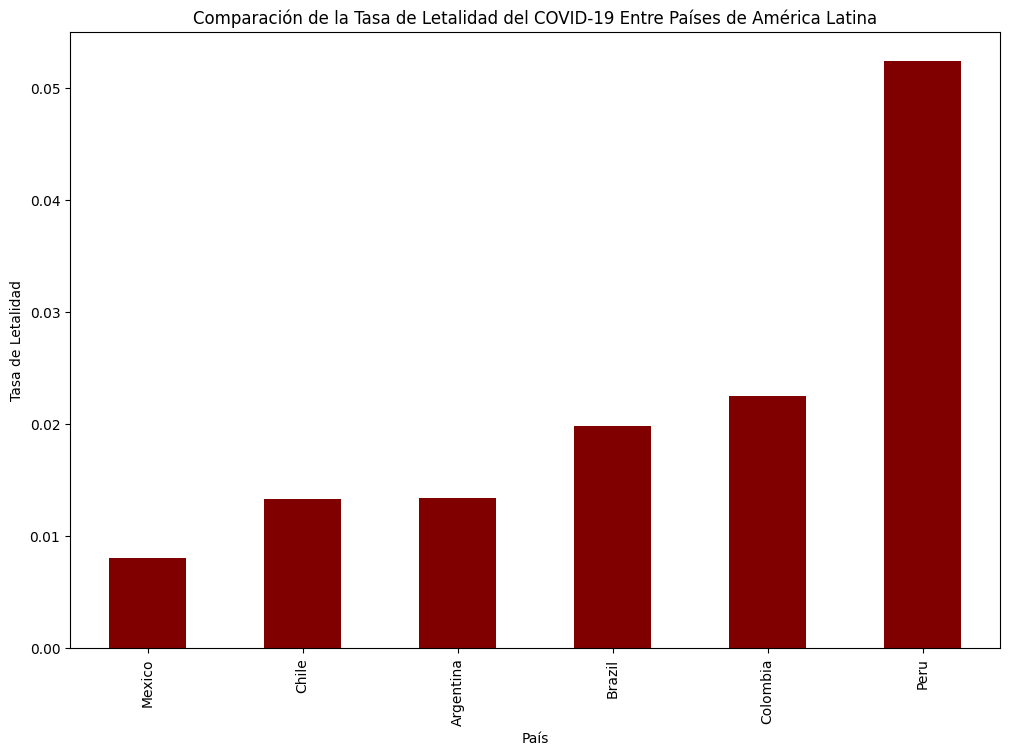

In [86]:
#  Fatalidad por pais

data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']
fatality_rates = data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()

plt.figure(figsize=(12, 8))
fatality_rates.plot(kind='bar', color='maroon')
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')
plt.show()

Todos los países han tenido un comportamiento similar en cuanto a la fatalidad, sin embargo apoyandose con las otras gráficas se puede observar que ha disminuido.

Los casos nuevos y las muestes nuevas ha variado de la siguiente manera esto debido a la vacucación y a las medidas tomadas por los paises, ademas de que se ha disminuido la cantidad de personas que se han contagiado y fallecido.

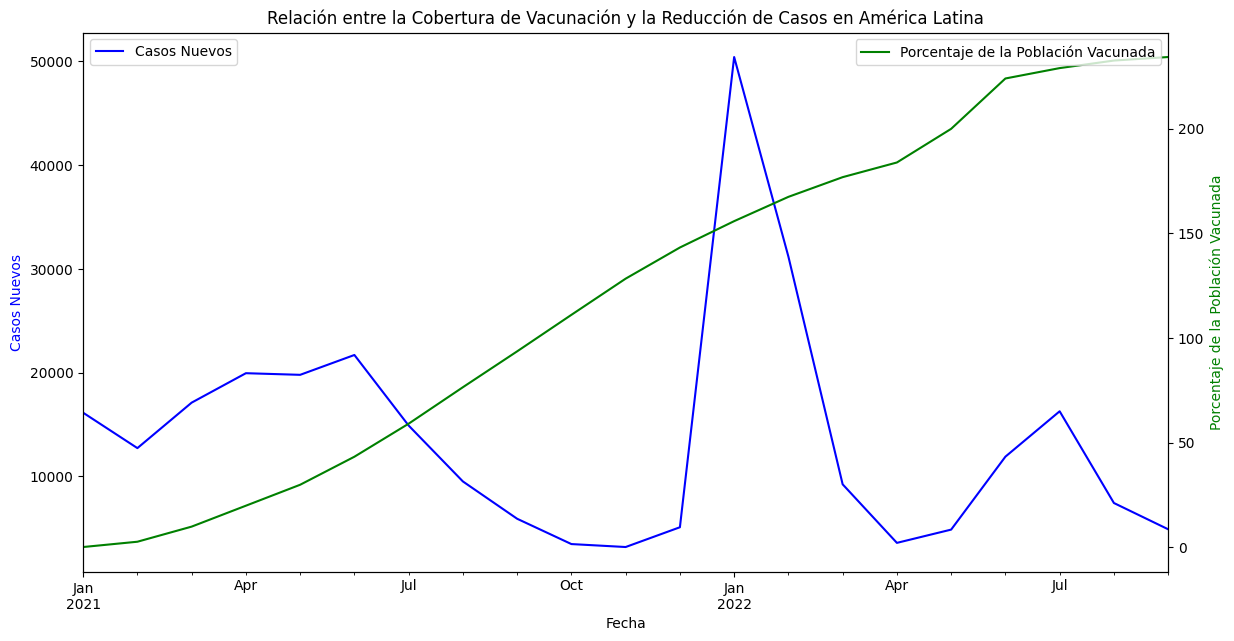

In [87]:
# Como evoluciona la vacunación en América Latina y la reducción de casos de COVID-19
plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

#crea percentajes de vacunacion
data_latinoamerica_paises['percentage_vaccinated'] = data_latinoamerica_paises['cumulative_vaccine_doses_administered'] / data_latinoamerica_paises['population'] * 100

# Gráfico mis dos lineplots
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Los datos parecerían indicar que cuando se incrementó la población vacunada la cantidad de casos que venia creciendo comenzó a estabilizarse en valores de inicio de pandemia.

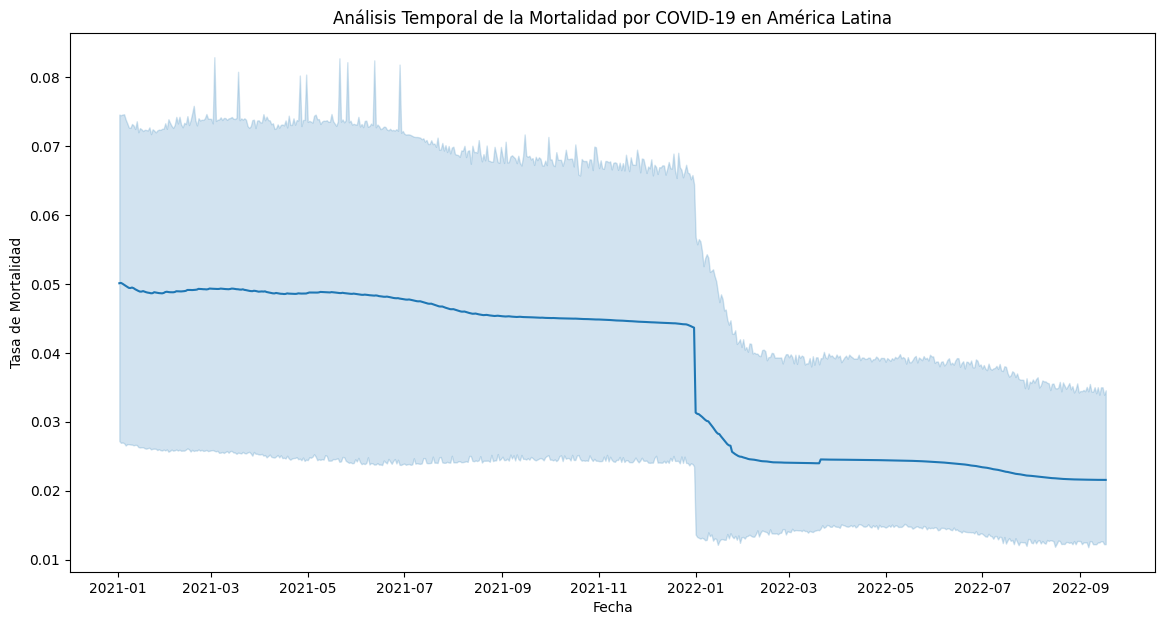

In [88]:
# cómo evolucionó la mortalidad

data_latinoamerica_paises['mortality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=data_latinoamerica_paises, 
    x='date', 
    y='mortality_rate', 
    estimator='mean'
)
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

La mortalidad por Covid 19 fue cayendo de manera pronunciada en la medidad en que avanzó la campaña de vacunación en America Latina. 

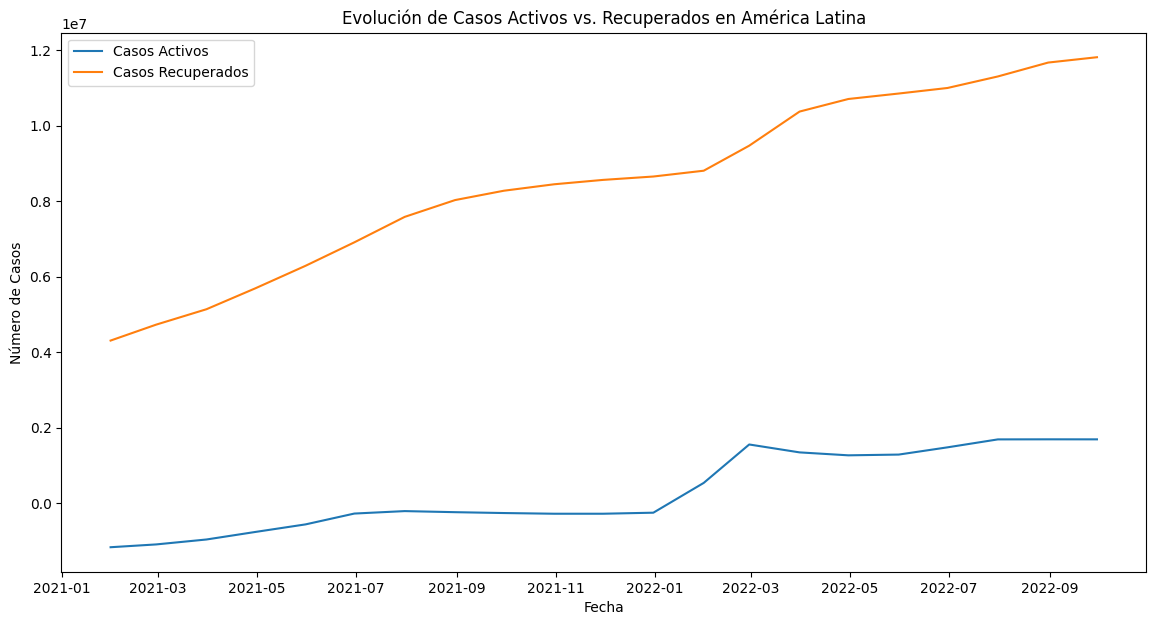

In [89]:
# Como evolucionan los casos activos y recuperados en América Latina
## Creo la columna active cases
data_latinoamerica_paises['active_cases'] = data_latinoamerica_paises['cumulative_confirmed'] - data_latinoamerica_paises['cumulative_deceased'] - data_latinoamerica_paises['cumulative_recovered']

# Grafico dos lineas sobre el mismo eje: 
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')

plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')
plt.legend()
plt.show()

La cantidad de casos activos fue creciendo mientras crecia a la par la cantidad de casos recuperados. 

In [90]:
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].last().sort_values(by="active_cases")
current_situation

active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Brazil           177399.00           33706231.00            685203.00
Colombia         721588.00            5441021.00            141708.00
Argentina       2811649.00            6756284.00            129830.00
Chile           3036299.00            1471374.00             60822.00
Mexico                 NaN                   NaN             23985.00
Peru                   NaN                   NaN            216173.00

In [ ]:
# Situación actual de los países de América Latina en términos de casos activos, recuperados y fallecidos por COVID-19:
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
current_situation

active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Colombia         721588.00            5441021.00            155770.00
Argentina       2811649.00            6756284.00            129830.00
Chile           3036299.00            1471374.00             60822.00
Brazil          3182910.00           33706231.00            685203.00
Mexico                 NaN                   NaN            304025.00
Peru                   NaN                   NaN            216173.00

In [ ]:
#Los datos de casos activos y recuperados no están disponibles en este último registro para Perú.
data_latinoamerica_paises[['country_name','active_cases', 'cumulative_recovered', 'cumulative_deceased']].loc[
    (data_latinoamerica_paises.index >= data_latinoamerica_paises.index.max())
]

country_name  active_cases  cumulative_recovered  \
date                                                          
2022-09-17    Argentina    2811649.00            6756284.00   
2022-09-17       Brazil     177399.00           33706231.00   
2022-09-17        Chile    3036299.00            1471374.00   
2022-09-17     Colombia     721588.00            5441021.00   
2022-09-17       Mexico           NaN                   NaN   
2022-09-17         Peru           NaN                   NaN   

            cumulative_deceased  
date                             
2022-09-17            129830.00  
2022-09-17            685203.00  
2022-09-17             60822.00  
2022-09-17            141708.00  
2022-09-17             23985.00  
2022-09-17            216173.00

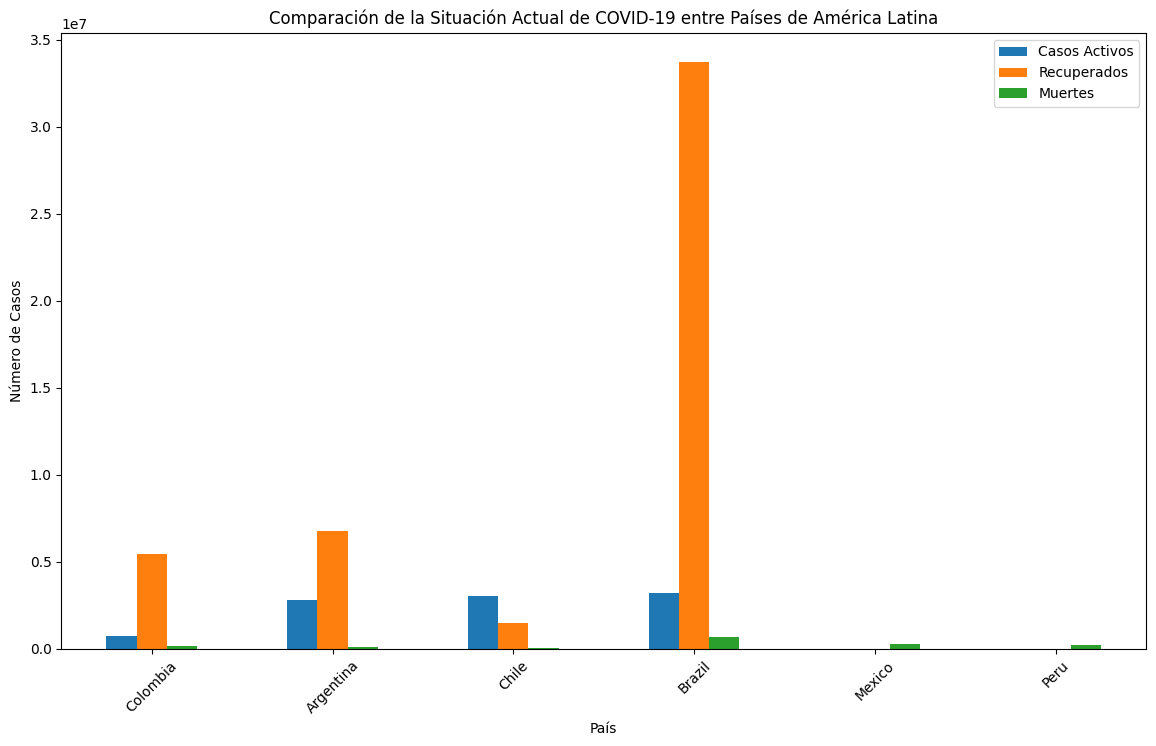

In [93]:
# No se tienen dato pero hay datos de recuperados y muertes en algunos paises
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()

Por algún mótivo el dataset no está persistiendo los datos acumulados de recuperados. Lo cual no nos permite ver la cantidad de recuperados actuales de cada pais

### EXTRA CREDIT

Para tener un mejor contexto graficamos la cantidad de vacunas administradas,los casos confirmados, muertes y recuperados.

In [ ]:
! pip install folium

In [ ]:
! pip freeze > ../requirements.txt

In [ ]:
# mapa para ver la distribución de casos confirmado, muertes, vacuna y recuperados
import folium
from folium.plugins import HeatMap

# Seleccionamos las columnas que vamos a utilizar
columns = ['latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered']
data_map = data_latinoamerica_paises[columns].dropna()

# Creamos un mapa centrado en América Latina
map = folium.Map(location=[-14.235004, -51.92528], zoom_start=3)

# Creamos un mapa de calor para los casos confirmados
heat_map_confirmed = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_confirmed']], radius=15)
map.add_child(heat_map_confirmed)

# Creamos un mapa de calor para las muertes
heat_map_deceased = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_deceased']], radius=15)
map.add_child(heat_map_deceased)

# Creamos un mapa de calor para las vacunas administradas
heat_map_vaccine = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_vaccine_doses_administered']], radius=15)
map.add_child(heat_map_vaccine)

# Creamos un mapa de calor para los recuperados
heat_map_recovered = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_recovered']], radius=15)
map.add_child(heat_map_recovered)

map.save('mapa.html')

map

No se ve muy detallado en las anteriores gráficas, por lo que vamos a realizar un análisis más detallado de las dosis administradas, casos confirmados, muertes y recuperados en cada país pero con gráficos mas básicos manteniendo los mapas.

In [ ]:
# mapa para ver la distribución de casos confirmados en latinoamerica por país
import geopandas as gpd

# Path del Geo Dataframe descargado desde: https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
path = "ne_110m_admin_0_countries.zip"

# Cargo el dataset con el archivo
world = gpd.read_file(path)

# Visualizo las columnas de mi dataframe world
for column in world.columns:
    print(column)